# Exploring the simulation

### Things to look at:

### we are moainly interested in large payments or information that can help the bank advertise products to certain customers 

- Customer spending
    - Who are the highest spenders?
    - Avrg spending
    - Repeat payments (can we find who is part of the gym?)
    - Day/ Day_type
    - How much do people normally spend at businesses
    - When
- Recieving money from businesses
    - What businesses pay the most
    - When do businesses pay?
- Customer income
    - Who recieves the most money? And are these people with the highest balance?
    - When?
    - Can we find a point where people become unemployed?
- Halifax payments
- Balance
    - How do peoples balance fluctuate
    - Who has had the largest balance
- Spending between
    - Can we find businesses here or Landlords?
    - Can we find trends in the data by looking at time and day
    - who recieves the most money? And are these people with the highest balance?
    - Any repeat payments?
- Segment customers and businesses and do everything again?


In [2]:
#importing packages 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [12]:
df = pd.read_csv('Users/sasha/Desktop/DATASCIENCE/2023/Mini-Project/data.nosync/clean_data_set_2.csv')
df = df.loc[:, ~df.columns.str.match('Unnamed')]
df.head()

,Account,Amount,Balance,to_account,to_name,Date,Time,Transaction_ID,Decimal_time,Income,Employment,Day_type,Day
0,1461,1352.0,2582.04,1379.0,Starbucks,01/01/2020,00:00:00,0,0.0,2811.08,Employed,weekday,Wednesday
1,1088,1251.2,2285.19,1244.0,Adams,01/01/2020,00:00:00,1,0.0,2603.54,Employed,weekday,Wednesday
2,1447,1968.5,2479.09,1101.0,North Face,01/01/2020,00:00:00,2,0.0,4043.70,Employed,weekday,Wednesday
3,1207,1352.0,2530.55,1178.0,Coffee #1,01/01/2020,00:00:00,3,0.0,2768.97,Employed,weekday,Wednesday
4,1136,1968.5,3627.45,1305.0,Cass Art,01/01/2020,00:00:00,4,0.0,3975.15,Employed,weekday,Wednesday


In [29]:
businesses = np.delete(df.to_name.unique(), np.where(df.to_name.unique() == 'Between'))
df_from_business, df_spending = [x for _, x in df[df.to_name != 'Between'].groupby(df['Amount'] < 0)]
df_between = df[df.to_name == 'Between']


In [39]:
df_spending.groupby('to_name').agg({'Amount': [pd.Series.mean, pd.Series.std]})

Amount            
                                       mean         std
to_name                                                
A Yarn Story                     -50.854536   43.283048
ASK Italian                      -33.978579   18.022067
Adams                            -51.641722   29.844578
Bill's                           -28.861316   18.734121
Blackwell's                      -14.985000    7.063997
Cass Art                         -75.550714   35.220496
Coffee #1                         -2.623929    0.760434
Coop local                       -47.339662   24.403915
Costa Coffee                      -2.750549    1.020385
Deliveroo                        -20.844033    5.291342
Gap Kids                         -49.658462   37.637123
H&M                              -71.716167   46.723137
HMV                              -39.699200   45.637807
Halifax                         -633.775510  144.448816
Harvester                        -28.688301   19.507229
Hobbycraft                       -71.945258   35.057987
Hobgoblin Music                  -32.256000   33.680997
JD Sports                        -93.751343   51.000062
Matalan                          -70.890426   46.983462
Mickleburgh Musical Instruments  -29.492308   33.983073
Millets                         -108.356400   56.422966
Mountain Warehouse               -96.499771   51.101905
Next                             -79.518167   45.257196
Nike                             -80.144028   45.161641
North Face                       -96.088364   44.914887
PUREGYM                          -14.894348    2.794793
Pets Corner                      -33.575146   22.114401
Pets at Home                     -35.477435   24.807970
PizzaExpress                     -27.679131   19.659537
Red Lion                         -14.862254    5.931591
Rose & Crown                     -13.805523    3.062106
SUNNY CARE NURSERY              -896.785714  393.942570
Sainsbury local                  -46.079615   26.392382
Sports Direct                    -77.459735   48.295621
Starbucks                         -2.671144    0.867379
TK Maxx                          -72.897821   41.400058
Tesco Express                    -49.941037   25.616658
The Crown                        -14.020391    3.744733
The Royal Oak                    -13.973882    3.908692
Waterstones                      -13.320000    4.995000
White Hart                       -14.415314    4.633948
Wool                             -54.053684   43.664804

# Spending

### Who are the highest spenders and avrg spending?
To do this lets build a customer df to see how much people are spending, can then be visualised in tableau

In [98]:
customers = df_spending.groupby('Account').agg({'Amount': [pd.Series.sum, pd.Series.mean]})

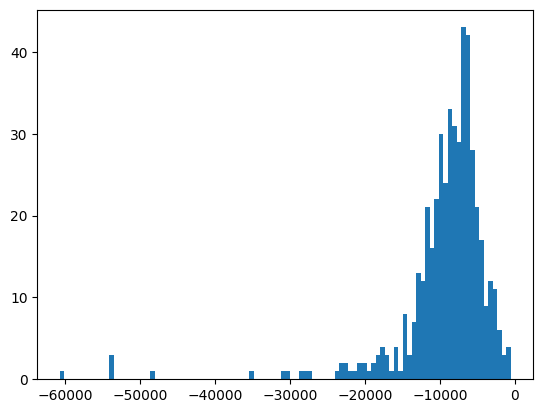

In [112]:
plt.hist(customers['Amount']['sum'], bins=100)
plt.show() 

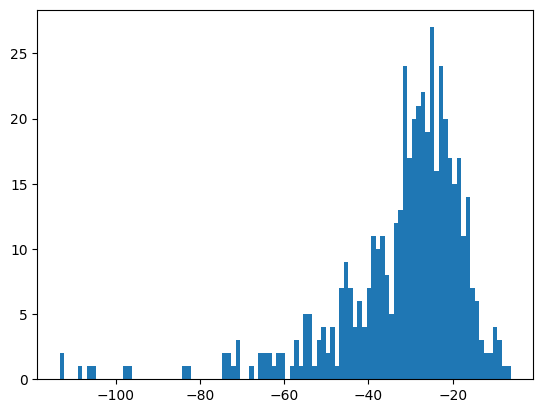

In [111]:
plt.hist(customers['Amount']['mean'], bins=100)
plt.show() 

### Repeat payments
This will be done in python, we will have to probably look at payments at midnight, or look at spikes in customer spending to one business

In [53]:
df_spending

,Account,Amount,Balance,to_account,to_name,Date,Time,Transaction_ID,Decimal_time,Income,Employment,Day_type,Day
134,1253,-650.00,612.29,Halifax,Halifax,01/01/2020,00:00:00,134,0.00,NaN,Unemployed,weekday,Wednesday
135,1461,-550.00,2032.04,Halifax,Halifax,01/01/2020,00:00:00,135,0.00,2811.08,Employed,weekday,Wednesday
136,1017,-525.00,-495.90,Halifax,Halifax,01/01/2020,00:00:00,136,0.00,NaN,Unemployed,weekday,Wednesday
137,1219,-550.00,1181.93,Halifax,Halifax,01/01/2020,00:00:00,137,0.00,3160.13,Employed,weekday,Wednesday
138,1353,-700.00,904.61,Halifax,Halifax,01/01/2020,00:00:00,138,0.00,4444.17,Employed,weekday,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
174596,1391,-19.24,-6585.98,Deliveroo,Deliveroo,03/31/2020,23:55:00,174596,23.92,NaN,Unemployed,weekday,Tuesday
174597,1405,-10.99,-1179.87,Deliveroo,Deliveroo,03/31/2020,23:56:00,174597,23.93,9624.01,Employed,weekday,Tuesday
174598,1391,-20.89,-6606.87,Deliveroo,Deliveroo,03/31/2020,23:56:00,174598,23.93,NaN,Unemployed,weekday,Tuesday
174599,1391,-17.24,-6624.11,Deliveroo,Deliveroo,03/31/2020,23:57:00,174599,23.95,NaN,Unemployed,weekday,Tuesday


In [64]:
repeats = df_spending.groupby(['Account', 'to_name', 'Decimal_time', 'Amount']).agg({'Date': pd.Series.count})

In [88]:
repeats = repeats[repeats.Date > 2].reset_index()

Sainsbury local (36, 7)


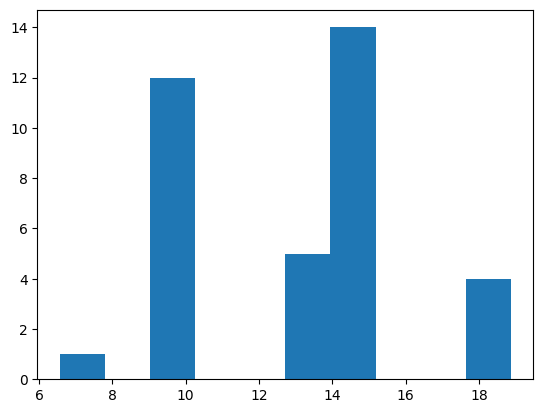

Halifax (58, 7)


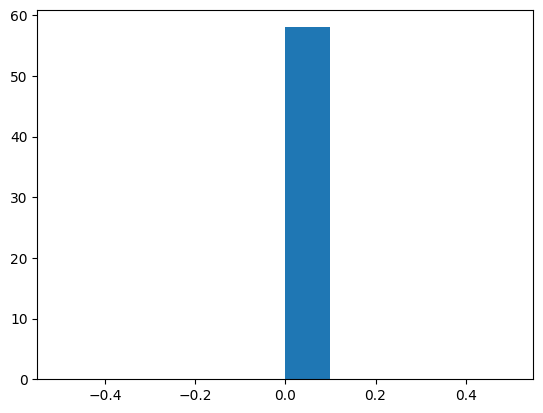

PUREGYM (230, 7)


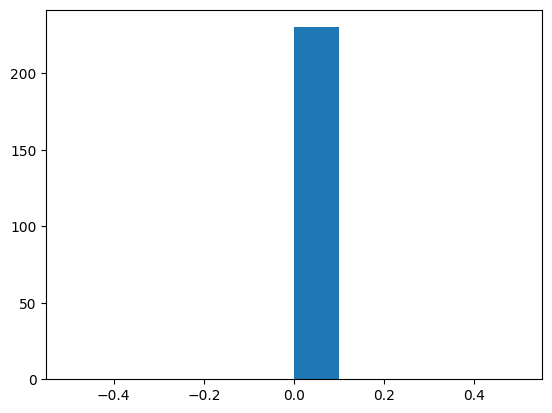

SUNNY CARE NURSERY (10, 7)


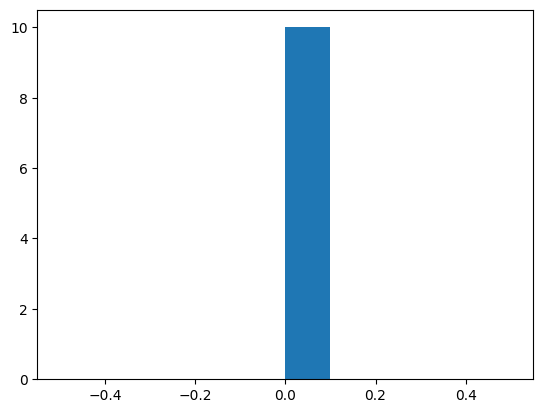

Deliveroo (23, 7)


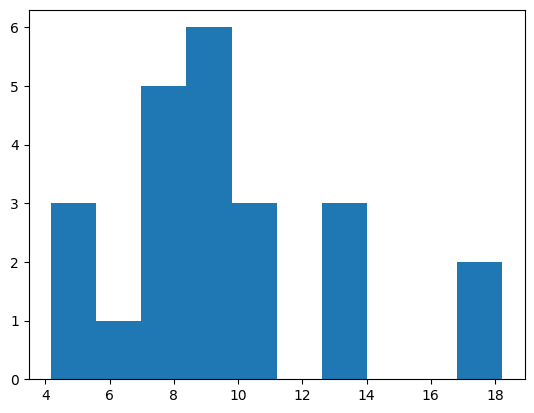

Coop local (64, 7)


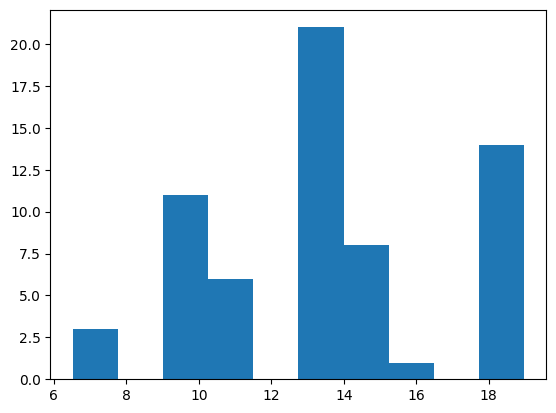

Harvester (6, 7)


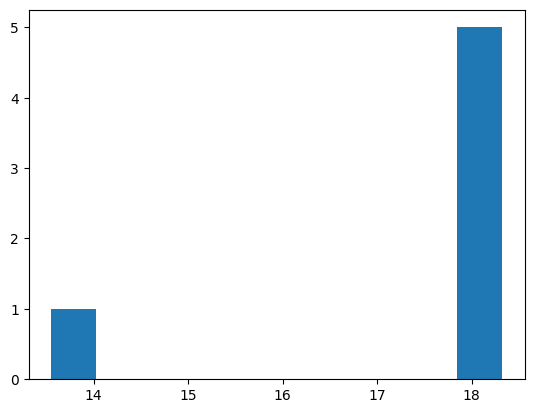

PizzaExpress (12, 7)


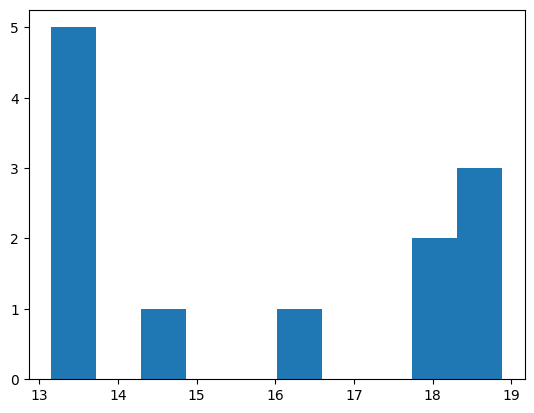

Costa Coffee (57, 7)


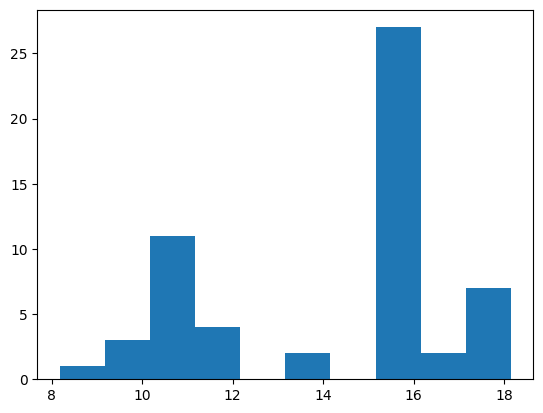

Coffee #1 (61, 7)


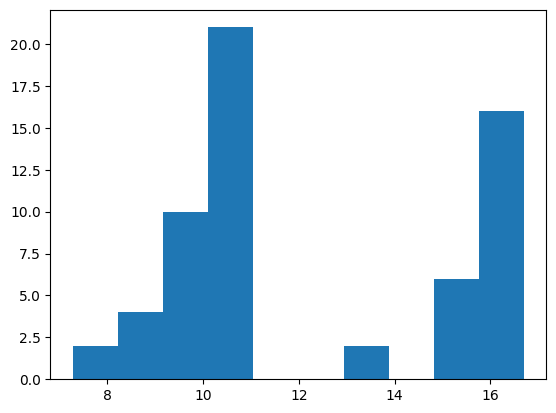

Tesco Express (61, 7)


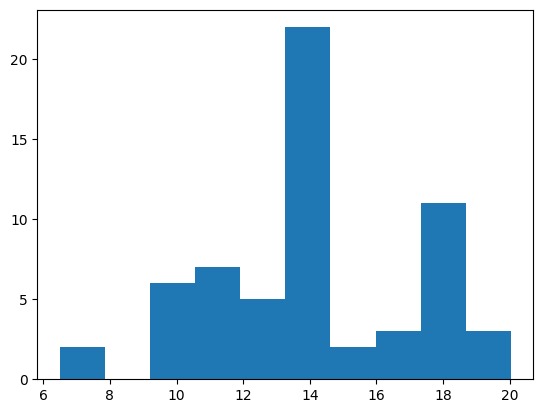

Starbucks (29, 7)


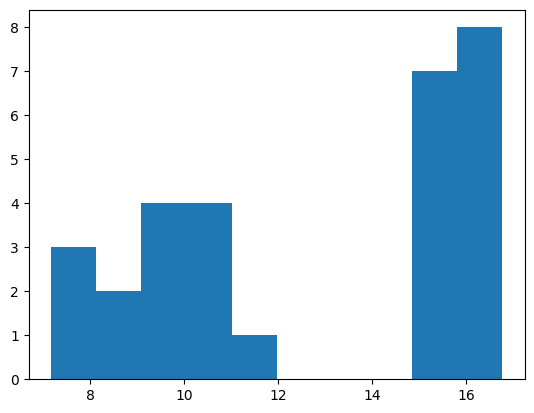

ASK Italian (6, 7)


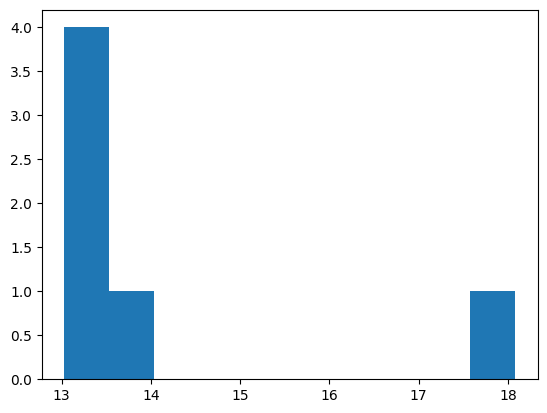

Bill's (4, 7)


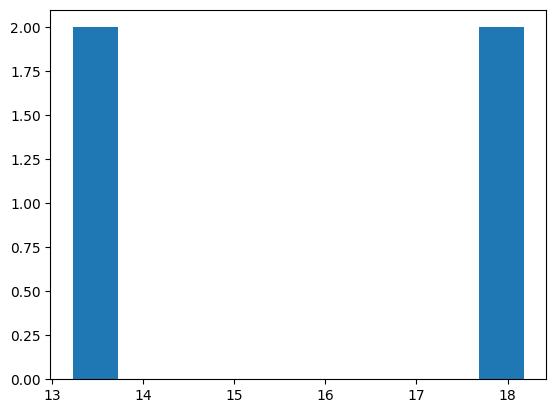

In [91]:
for business in repeats['to_name'].unique():
    print(business, np.shape(repeats[repeats.to_name == business]))
    plt.hist(repeats[repeats.to_name == business]['Decimal_time'])
    plt.show() 

### HALIFAX, Sunny Care Nursery and PUREGYM are the only businesses we will assume to have subscription services, this can be used to find if people have kids, are healthy, are are recieving loans

### Day patterns
Look at each business and plot a graph for the spending habits, easily done in tableau
We may also want to look at individual customer spending habits by looping through each customer and obtaining key metrics

Starbucks


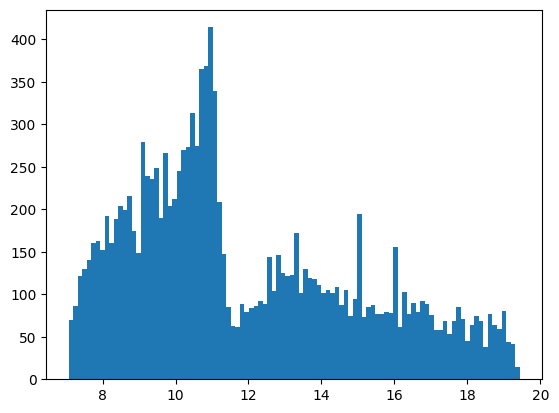

Adams


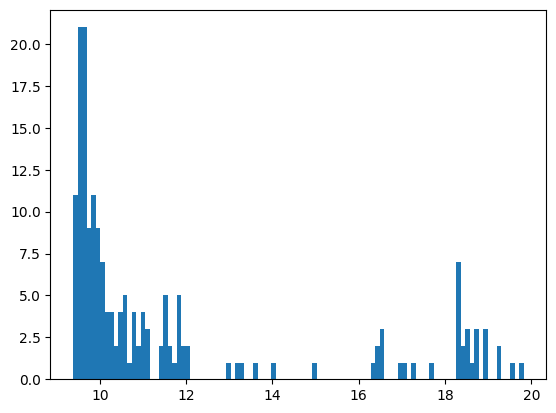

North Face


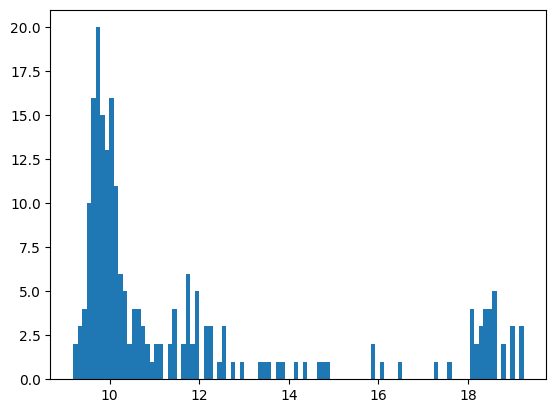

Coffee #1


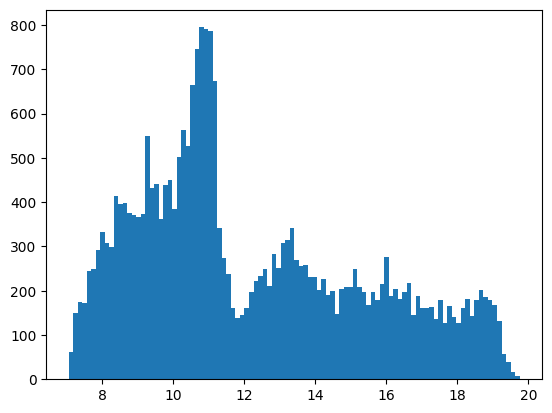

Cass Art


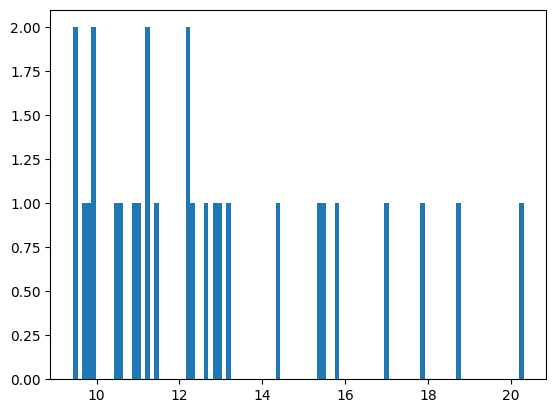

TK Maxx


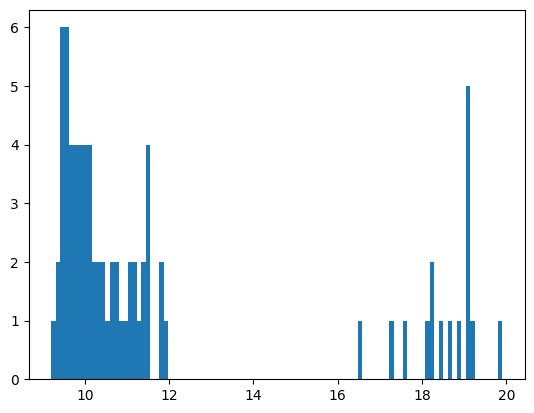

Mickleburgh Musical Instruments


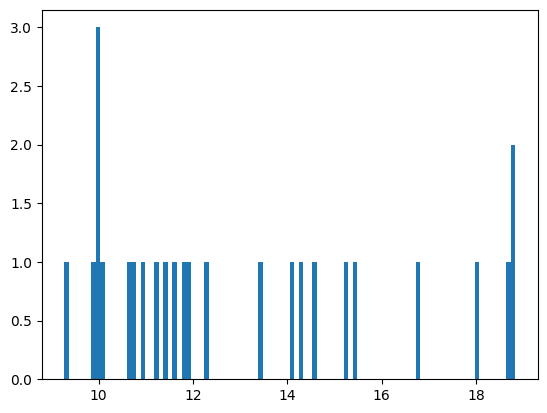

Pets Corner


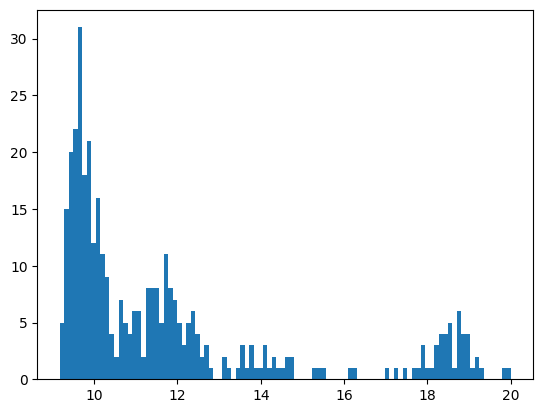

Pets at Home


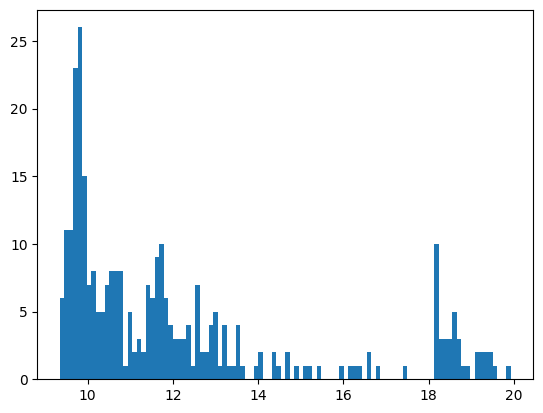

Costa Coffee


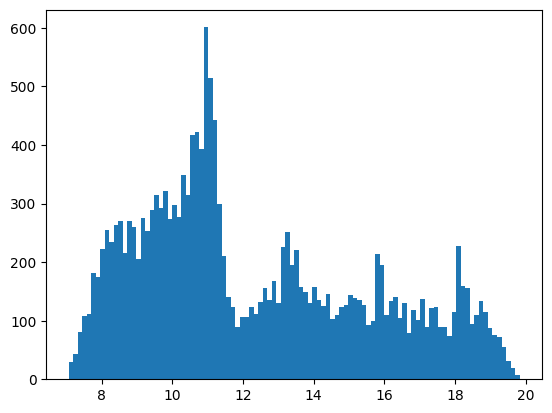

Waterstones


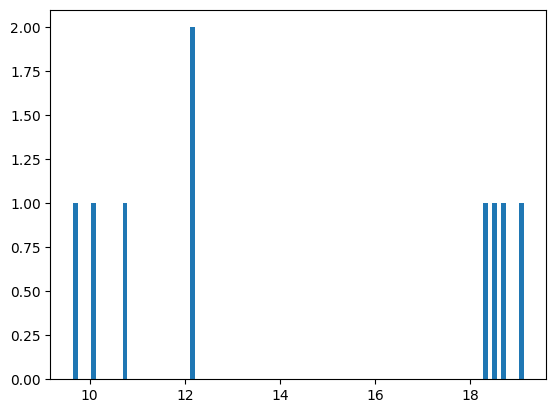

Gap Kids


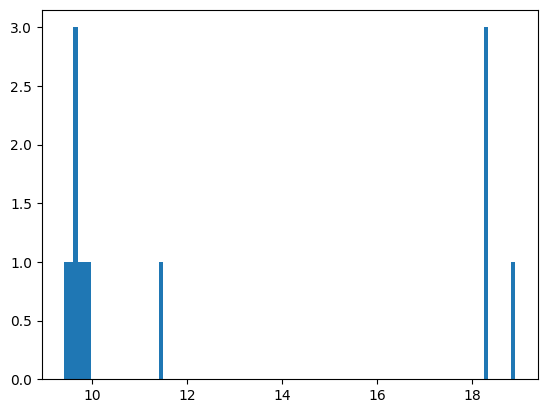

Game


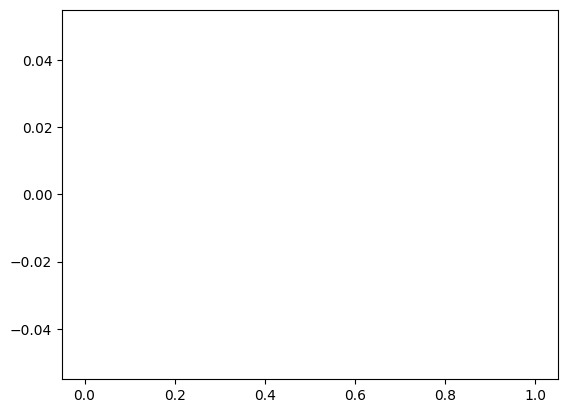

H&M


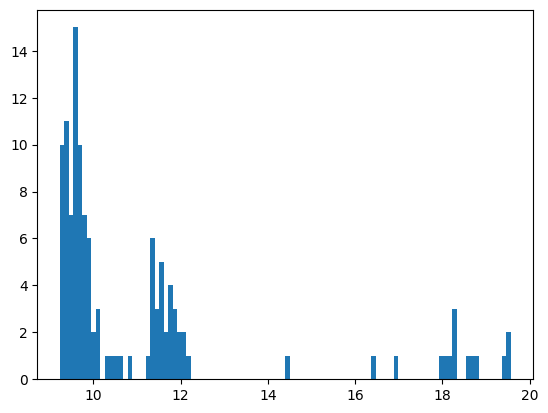

Blackwell's


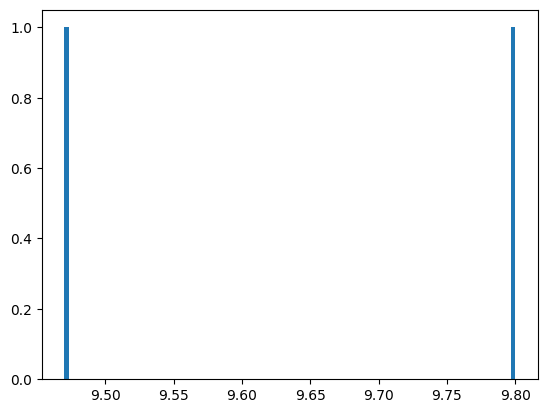

Halifax


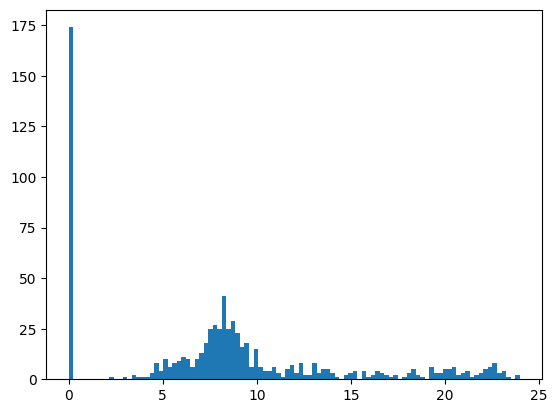

SUNNY CARE NURSERY


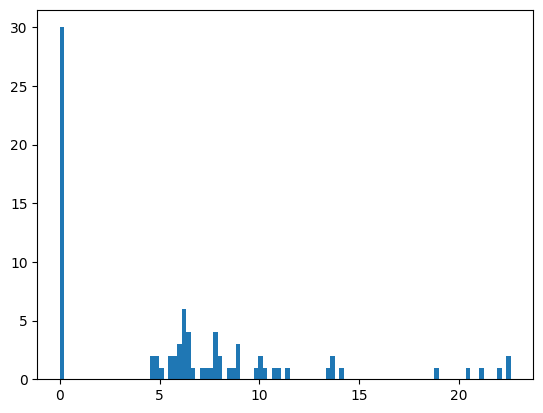

PUREGYM


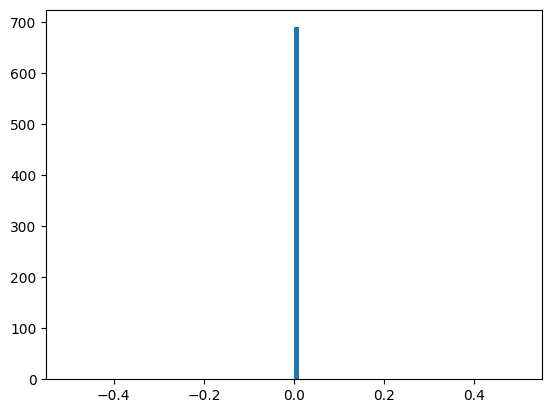

Coop local


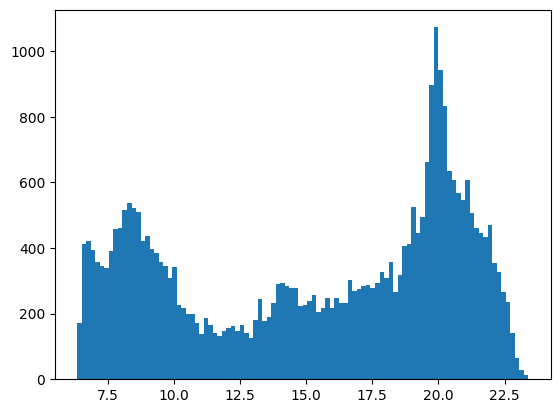

Deliveroo


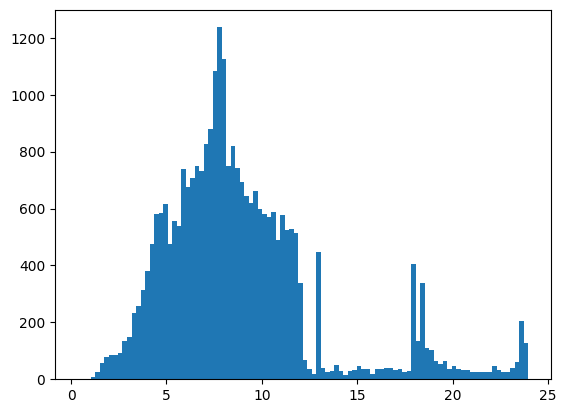

Tesco Express


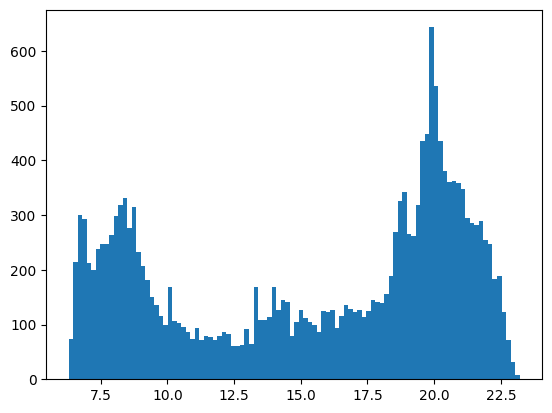

Sainsbury local


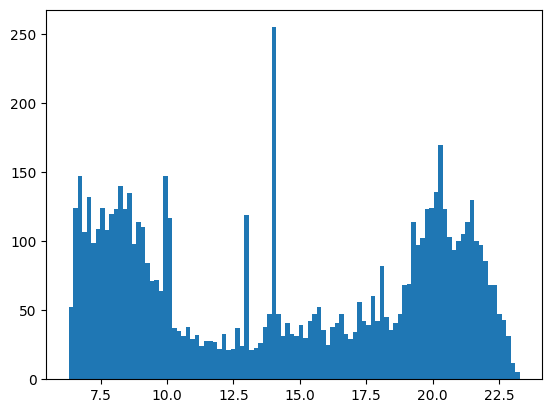

JD Sports


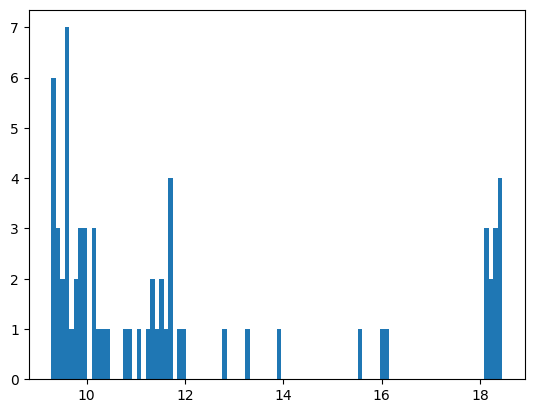

Mountain Warehouse


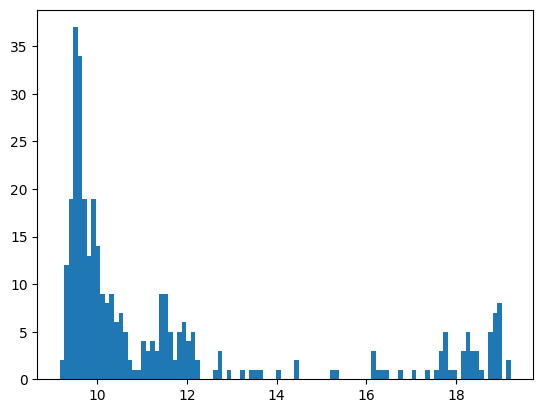

Next


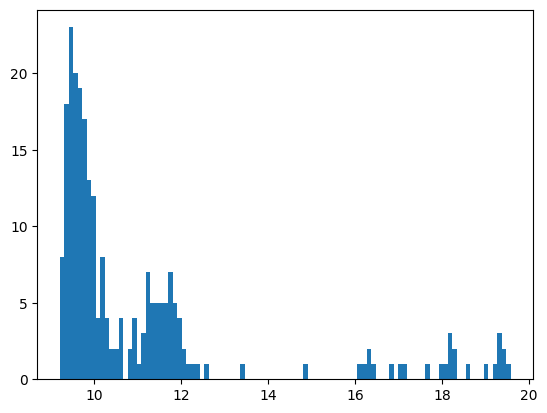

Nike


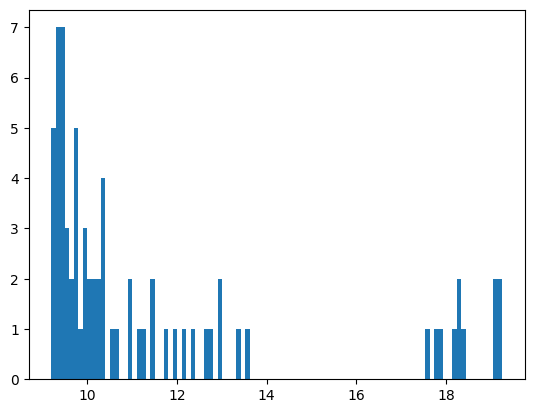

Sports Direct


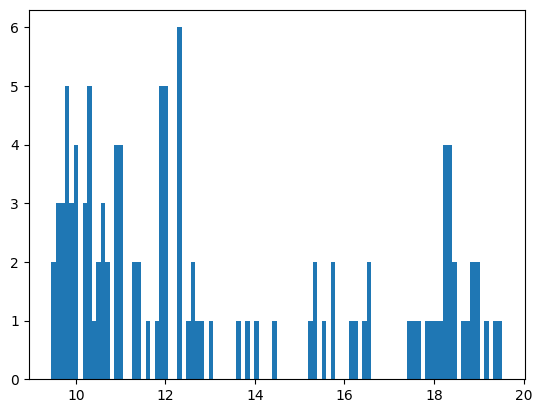

Matalan


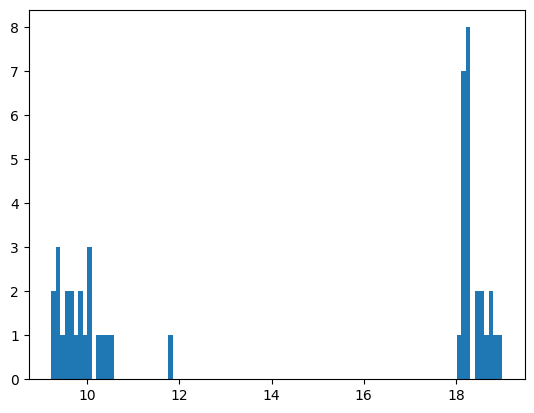

Millets


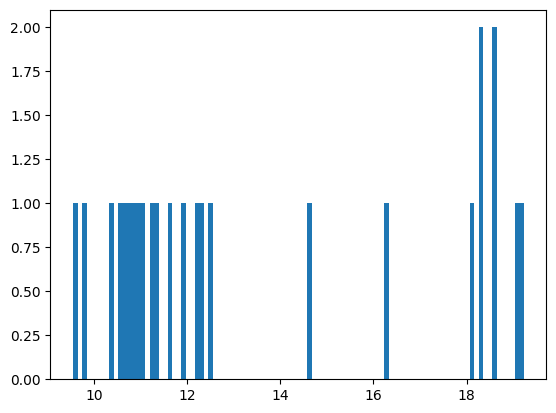

A Yarn Story


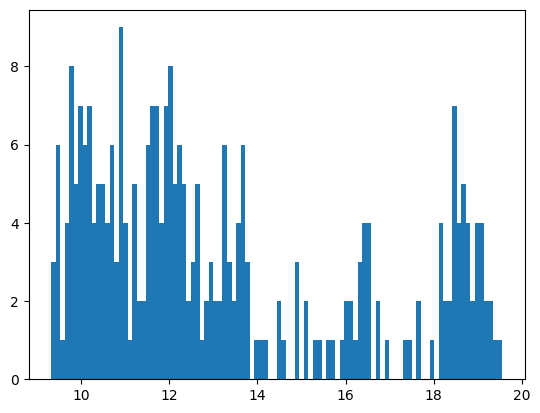

Hobbycraft


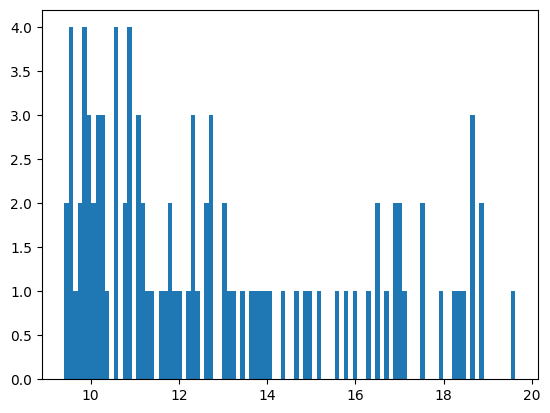

HMV


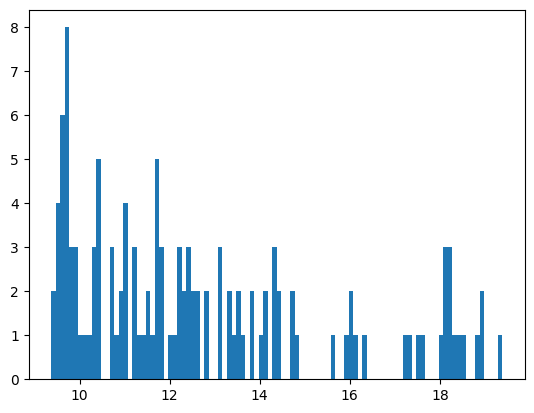

Wool


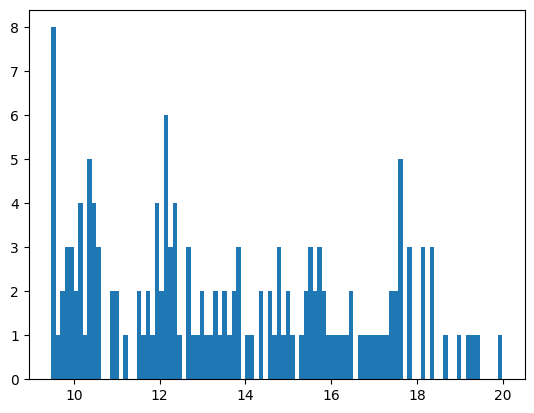

Hobgoblin Music


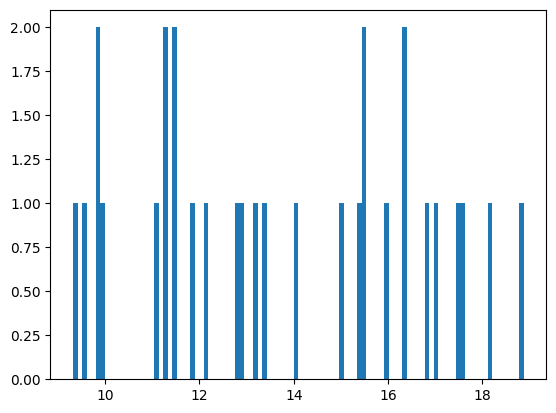

The Crown


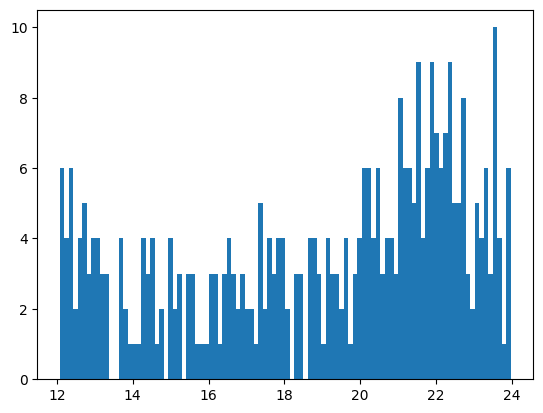

White Hart


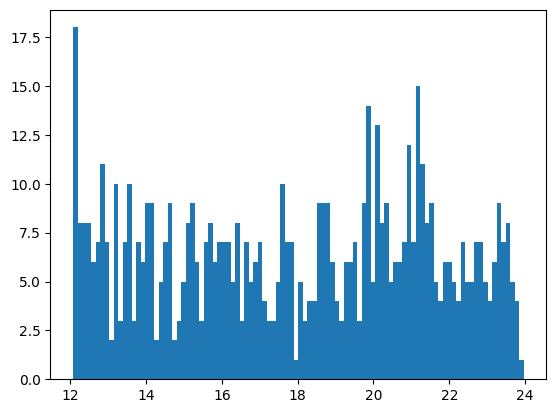

ASK Italian


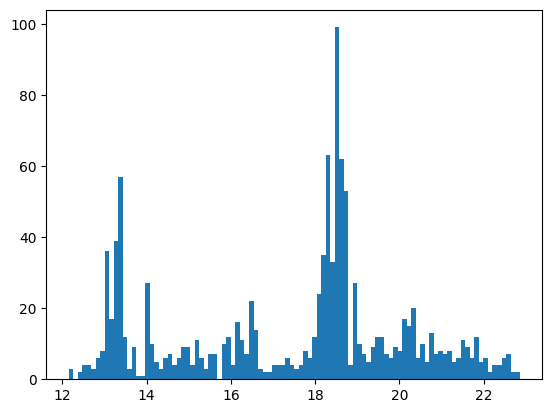

Rose & Crown


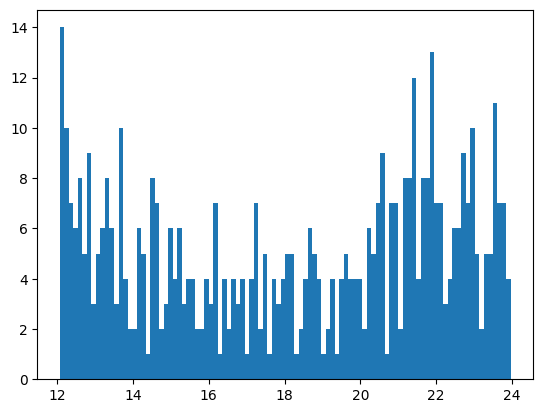

Red Lion


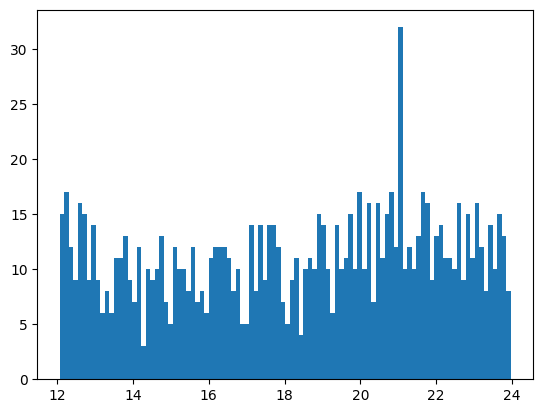

The Royal Oak


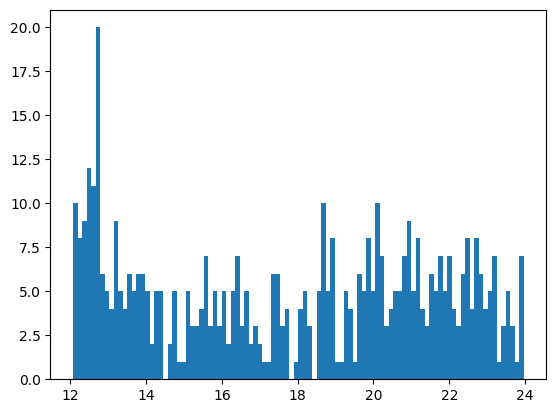

Harvester


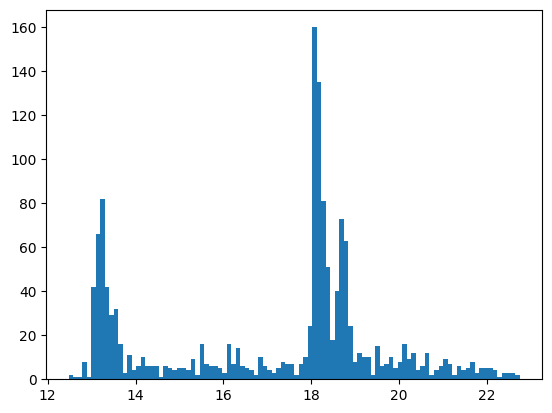

Bill's


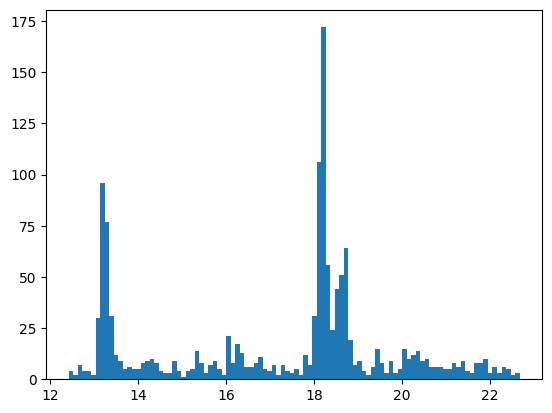

PizzaExpress


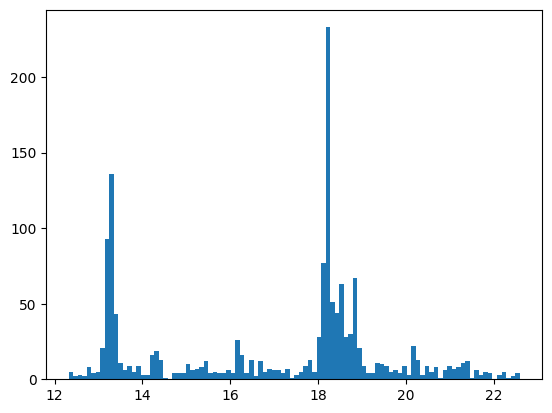

CeX


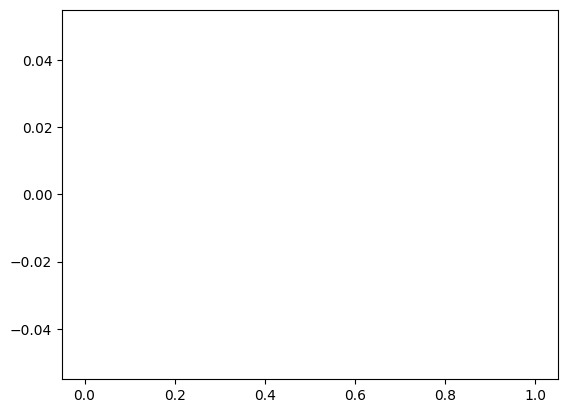

PureGym


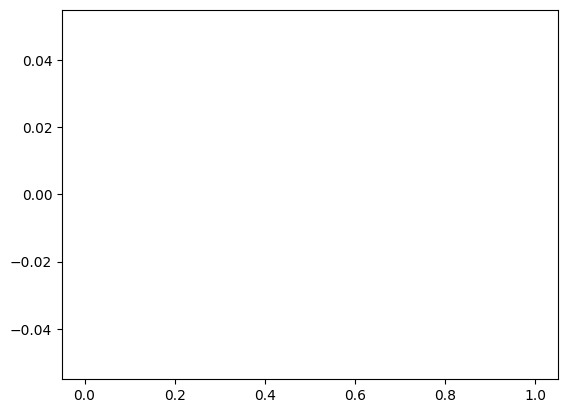

In [119]:
for business in businesses:
    print(business)
    plt.hist(df_spending[df_spending.to_name== business]['Decimal_time'], bins = 100)
    plt.show() 

Starbucks


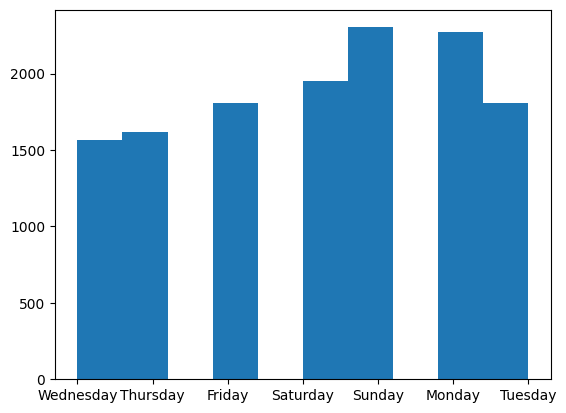

Adams


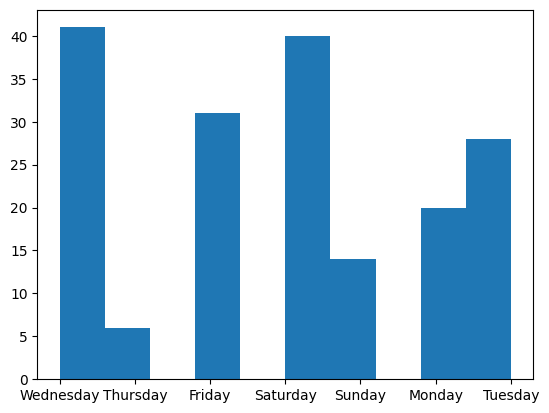

North Face


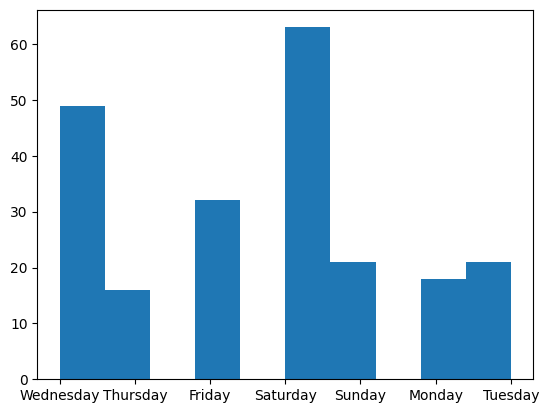

Coffee #1


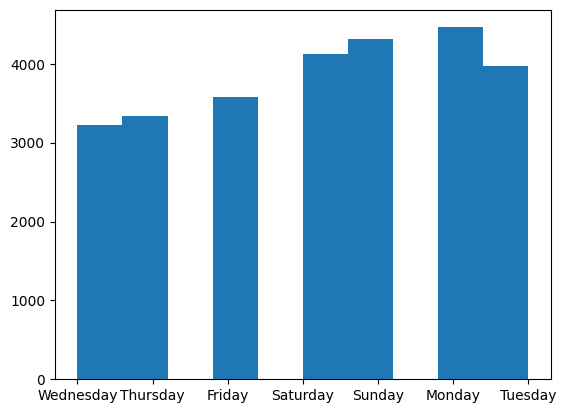

Cass Art


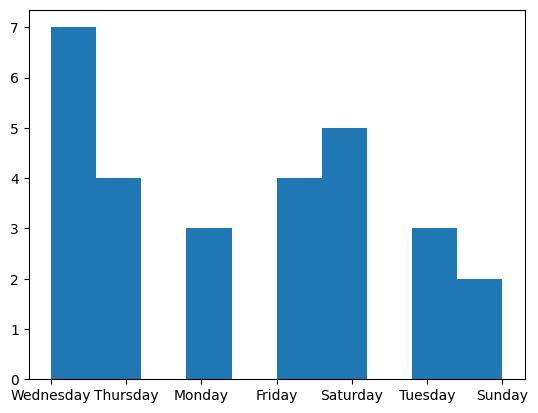

TK Maxx


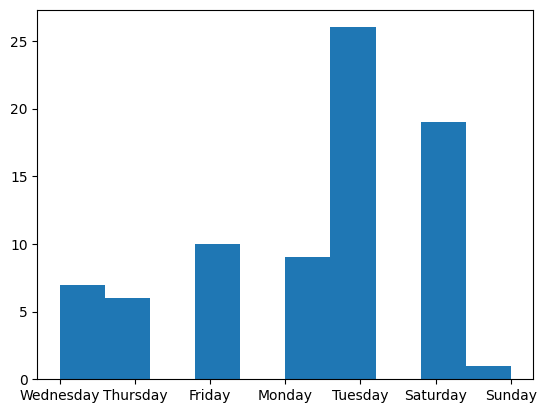

Mickleburgh Musical Instruments


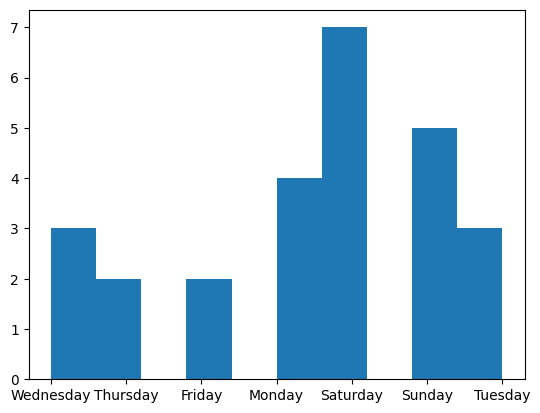

Pets Corner


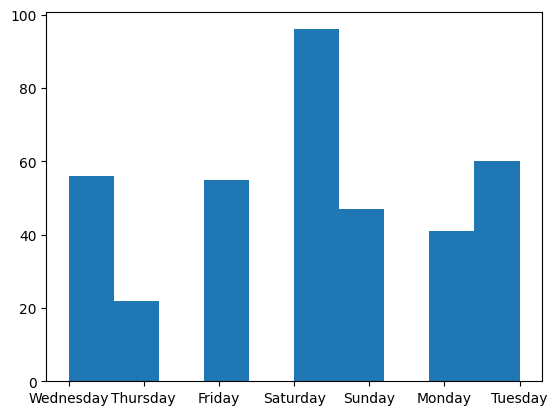

Pets at Home


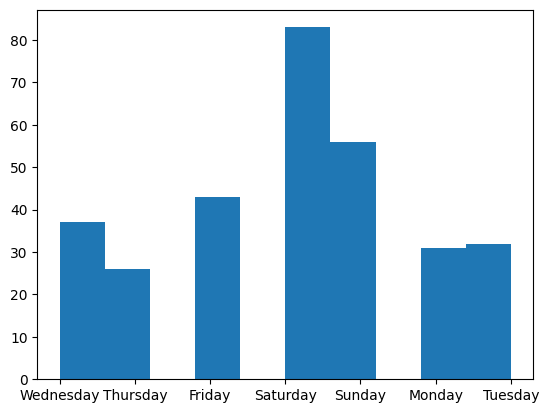

Costa Coffee


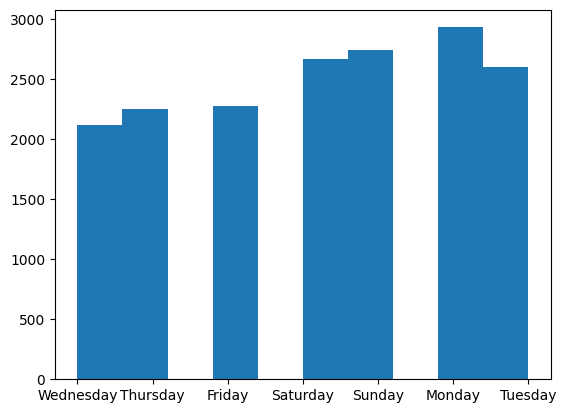

Waterstones


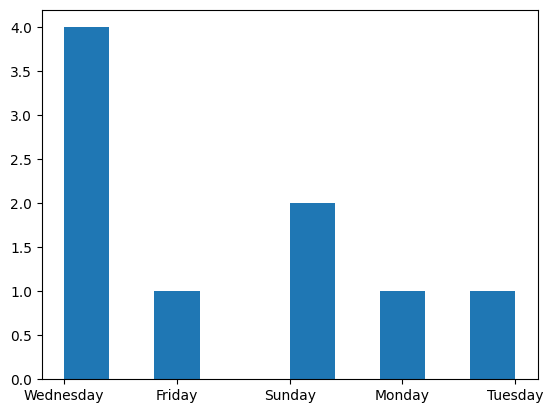

Gap Kids


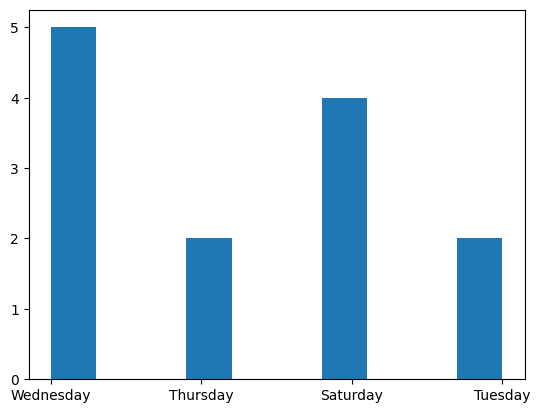

Game


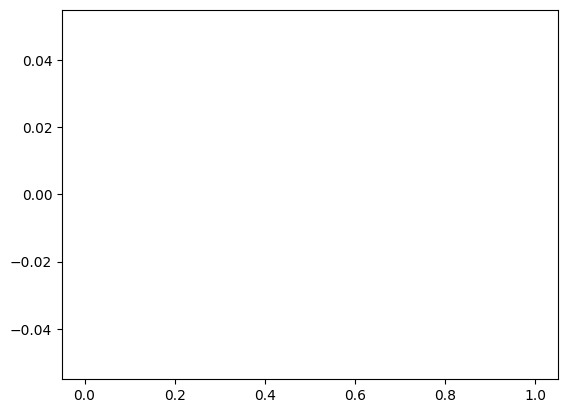

H&M


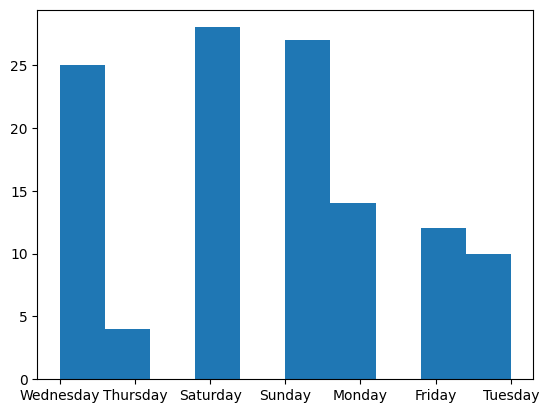

Blackwell's


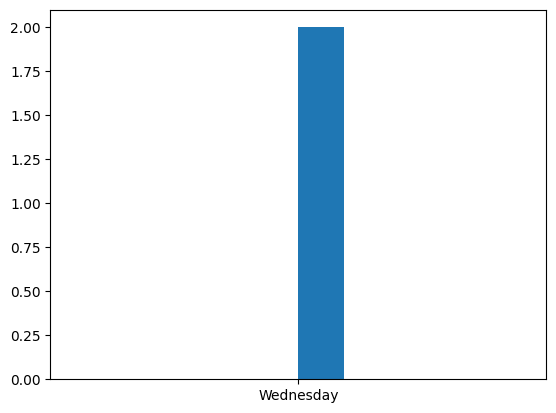

Halifax


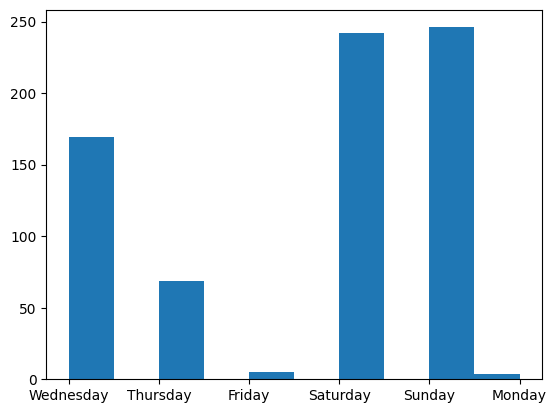

SUNNY CARE NURSERY


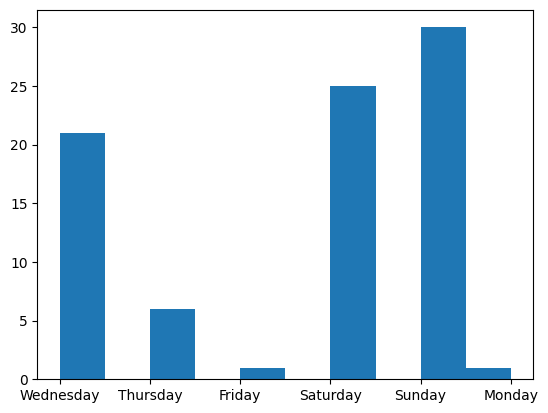

PUREGYM


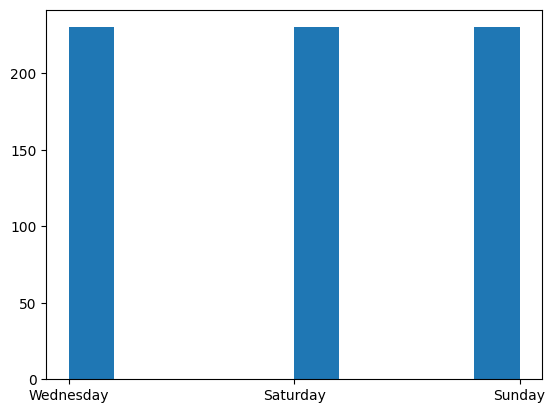

Coop local


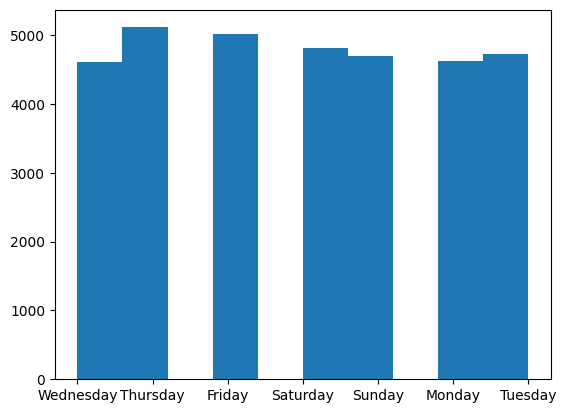

Deliveroo


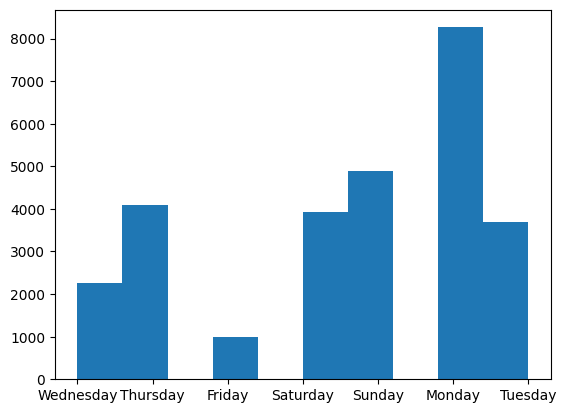

Tesco Express


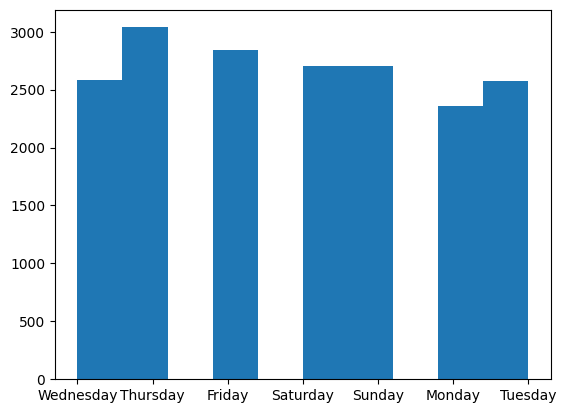

Sainsbury local


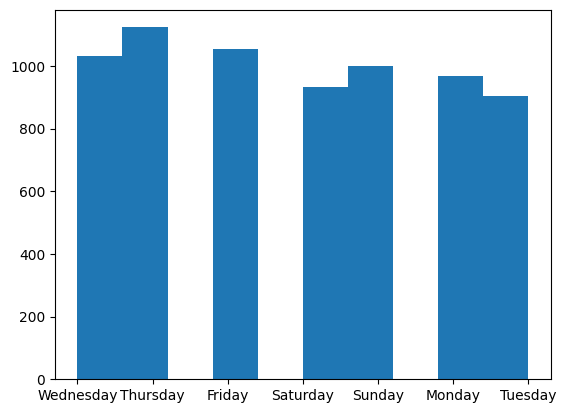

JD Sports


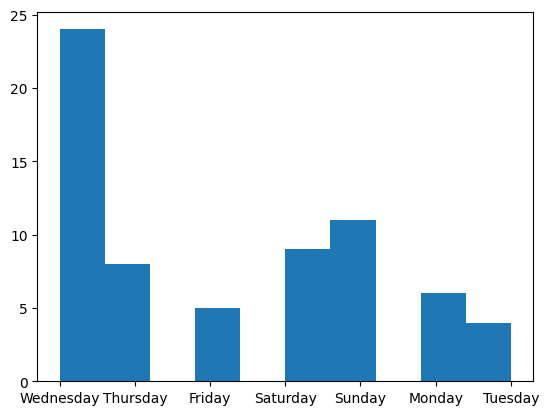

Mountain Warehouse


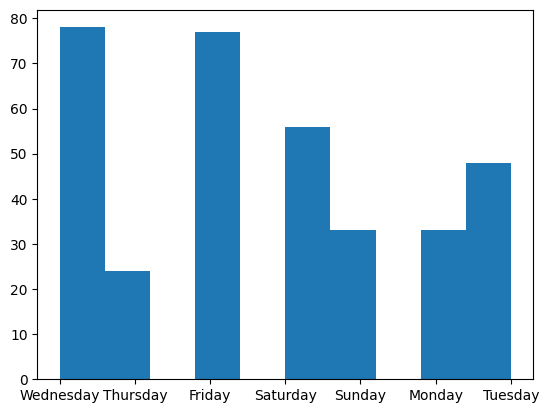

Next


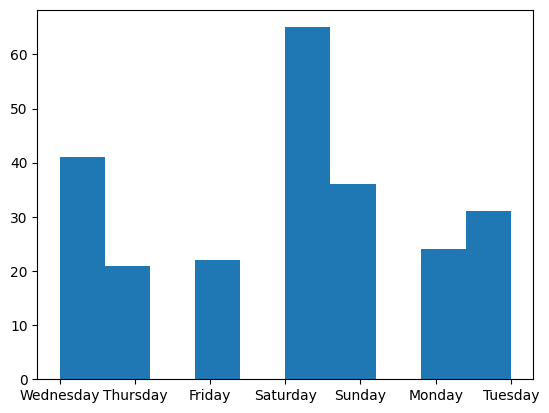

Nike


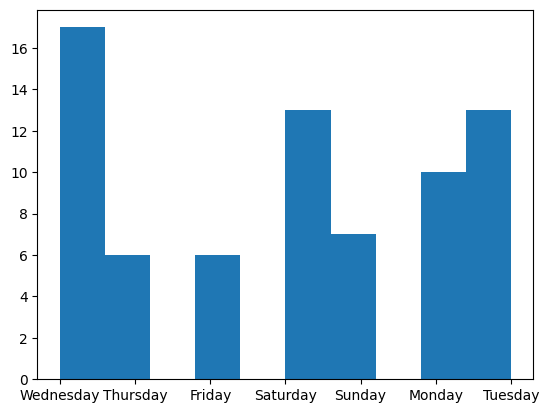

Sports Direct


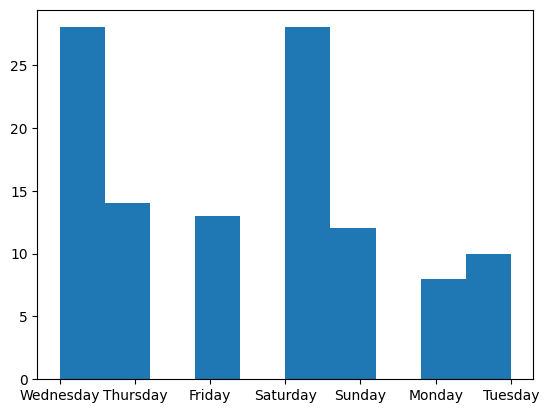

Matalan


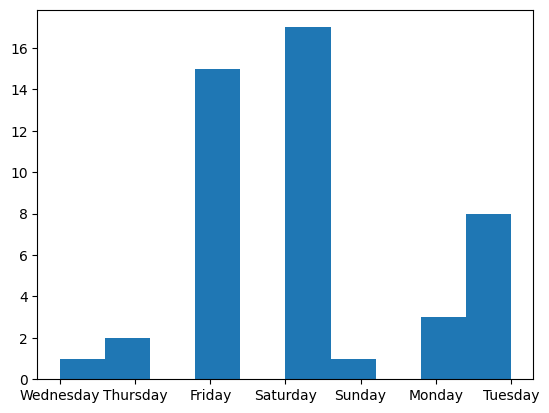

Millets


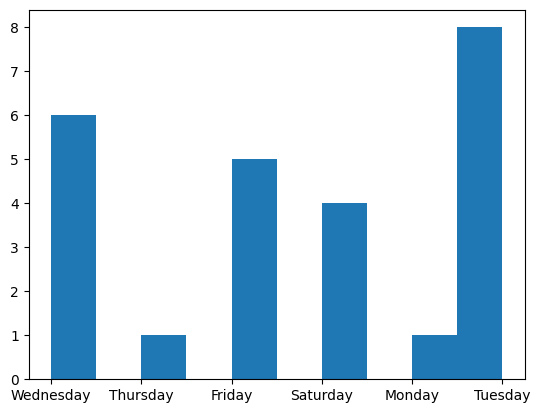

A Yarn Story


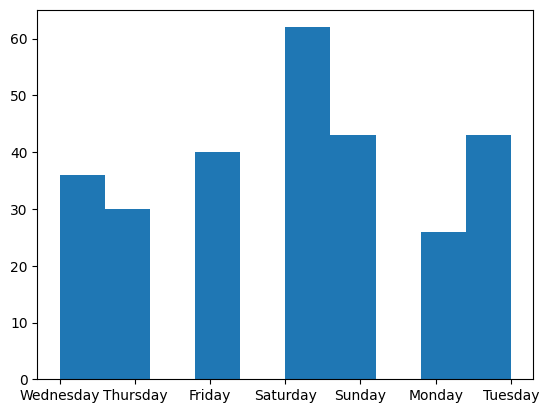

Hobbycraft


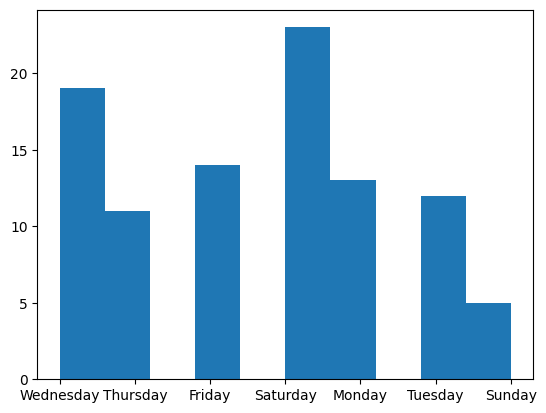

HMV


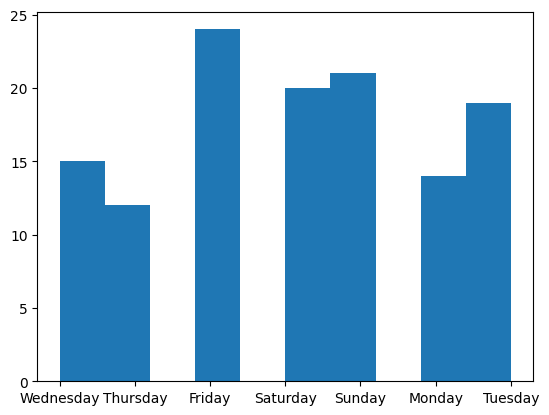

Wool


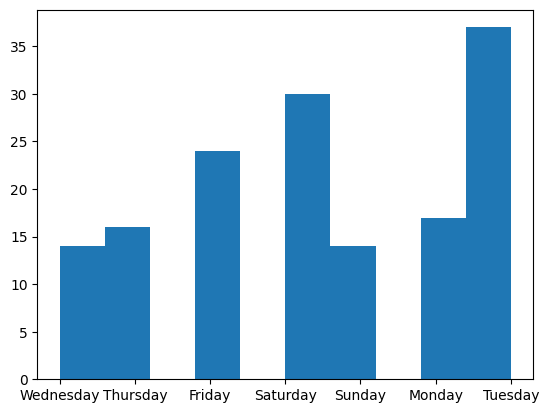

Hobgoblin Music


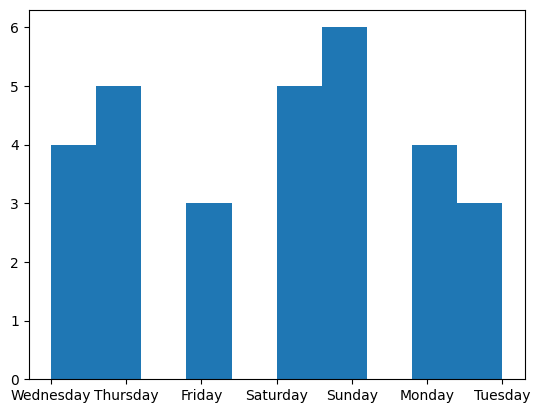

The Crown


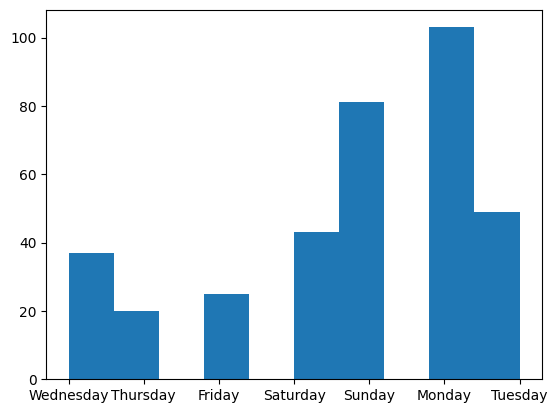

White Hart


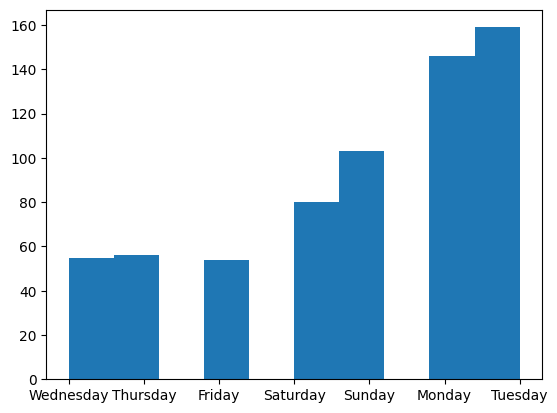

ASK Italian


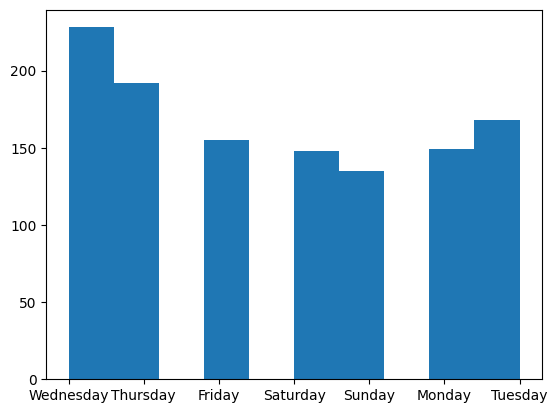

Rose & Crown


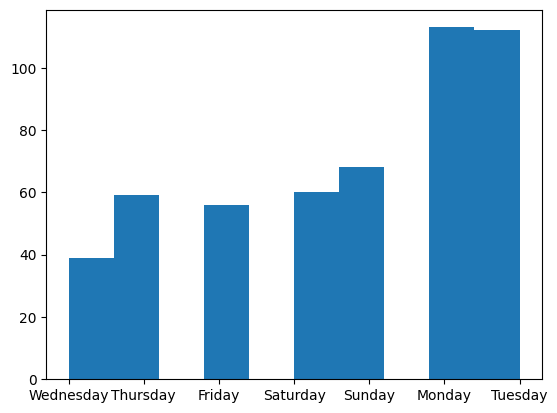

Red Lion


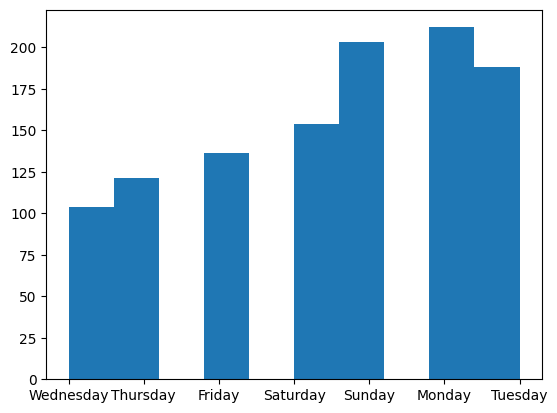

The Royal Oak


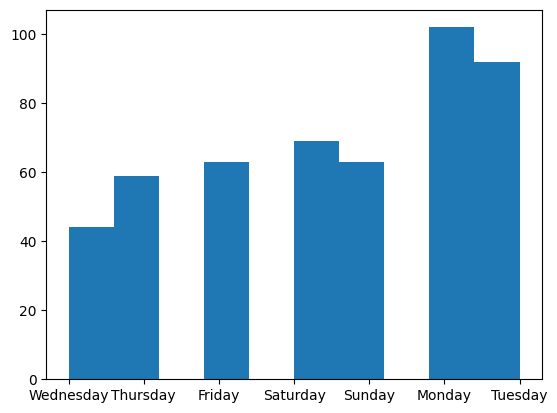

Harvester


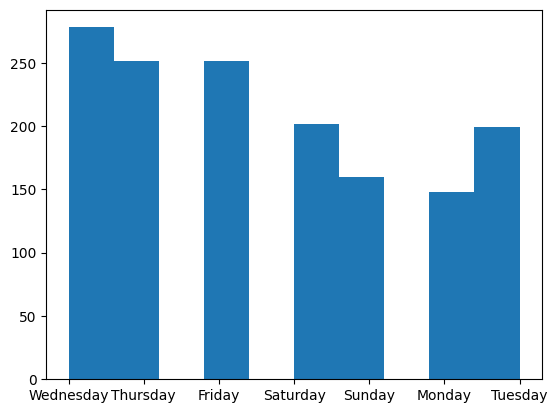

Bill's


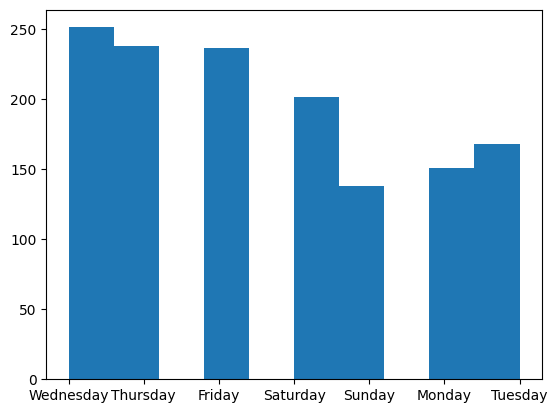

PizzaExpress


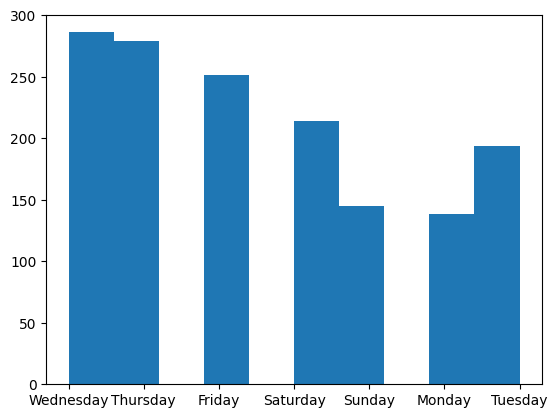

CeX


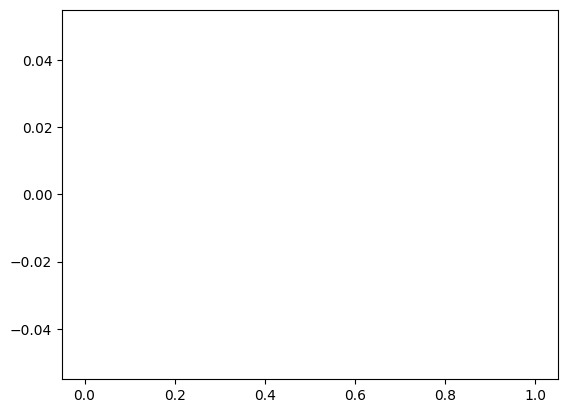

PureGym


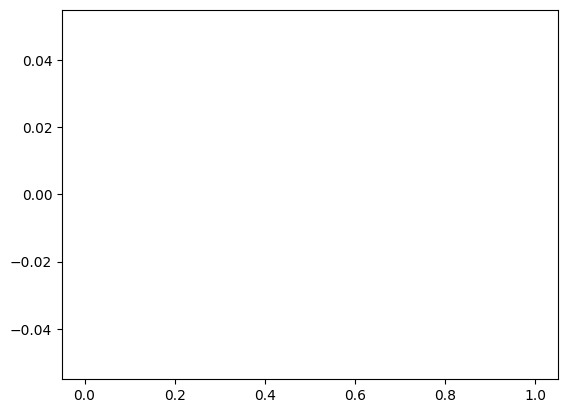

In [121]:
for business in businesses:
    print(business)
    plt.hist(df_spending[df_spending.to_name== business]['Day'])
    plt.show() 

### This data set is clearly more realistic then the first in this category

### How much people normally spend at businesses
Easily done in tableau

Starbucks


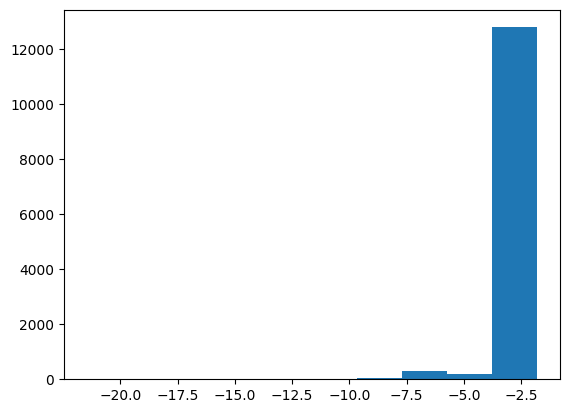

Adams


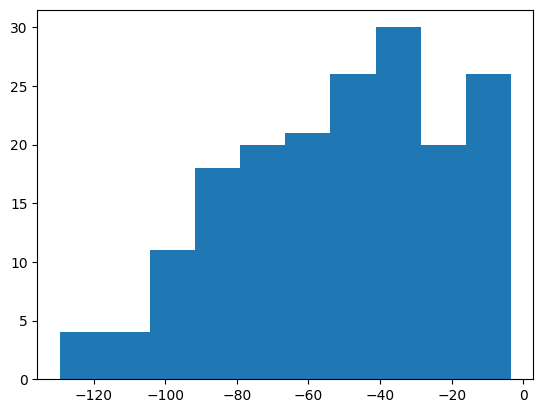

North Face


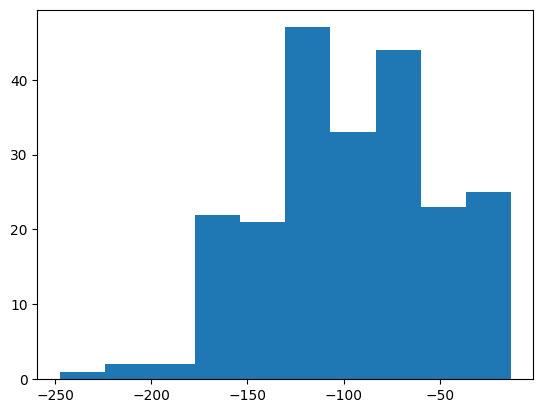

Coffee #1


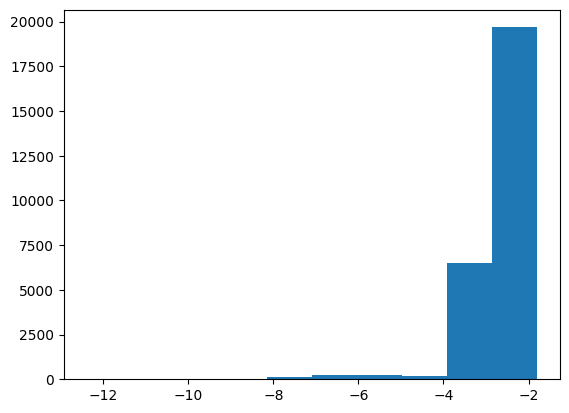

Cass Art


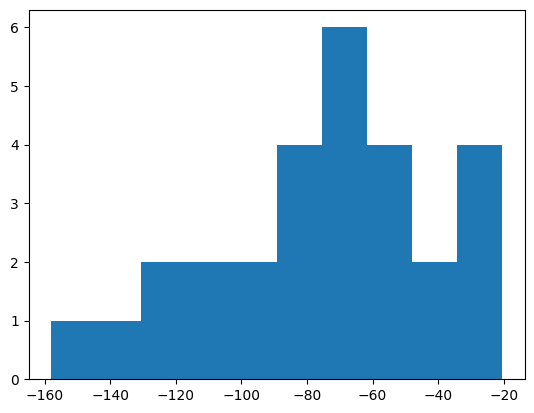

TK Maxx


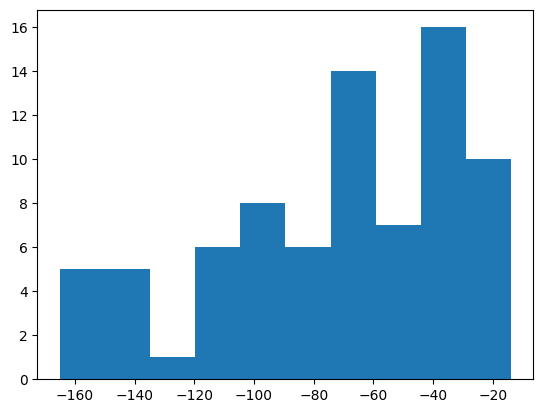

Mickleburgh Musical Instruments


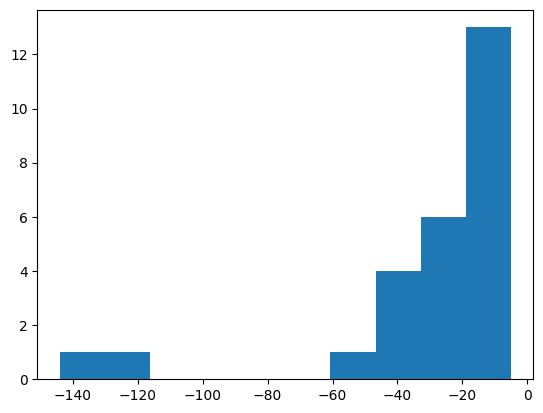

Pets Corner


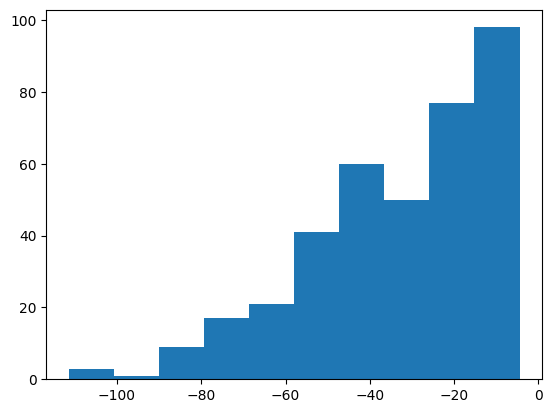

Pets at Home


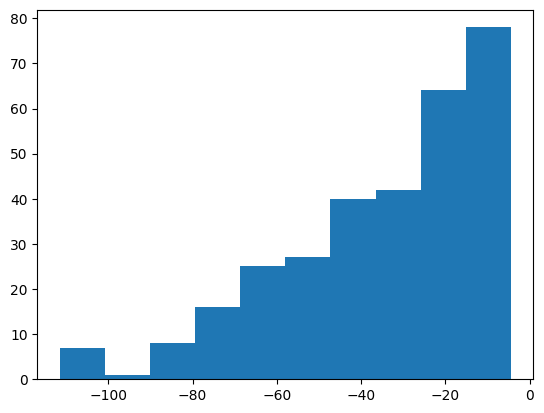

Costa Coffee


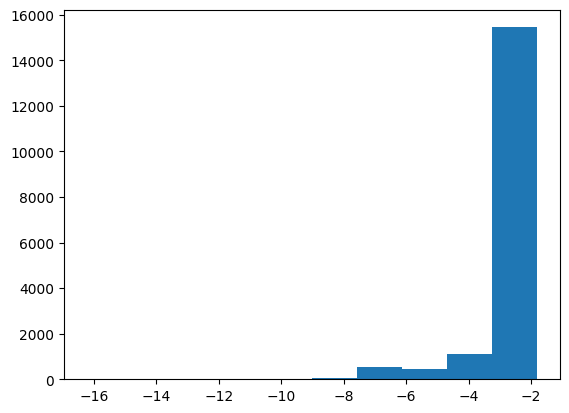

Waterstones


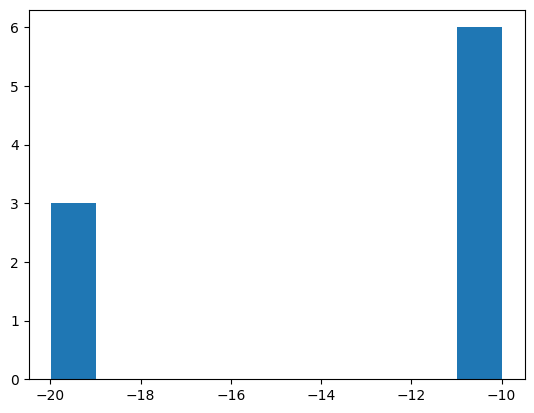

Gap Kids


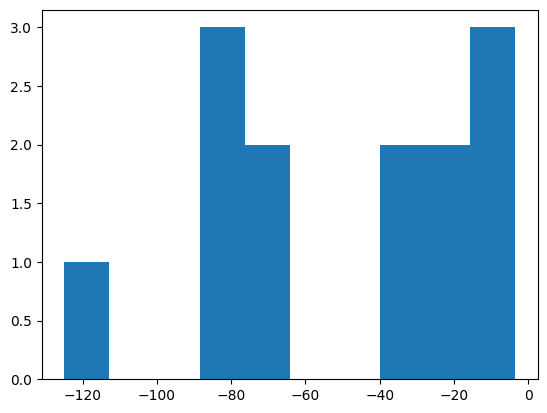

Game


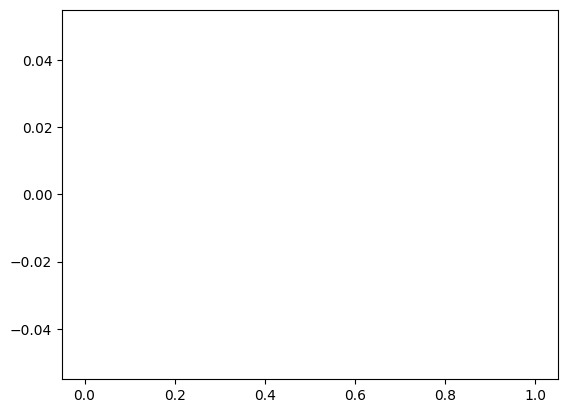

H&M


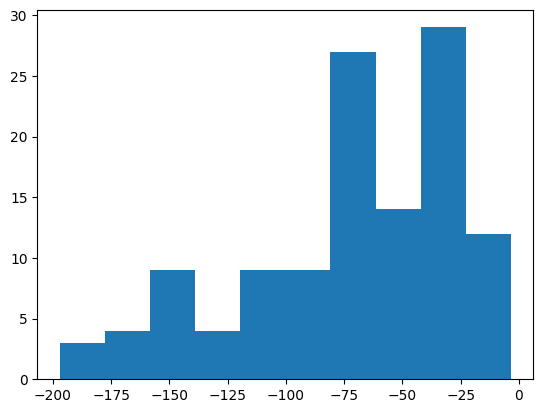

Blackwell's


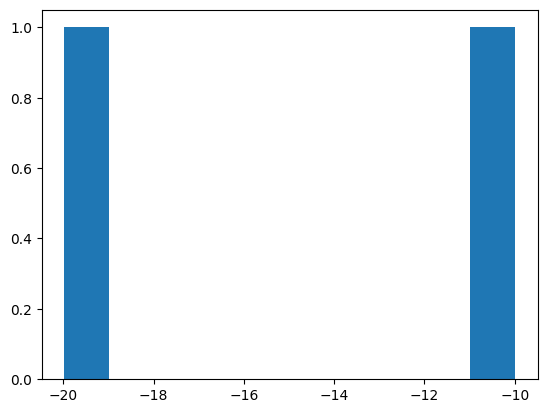

Halifax


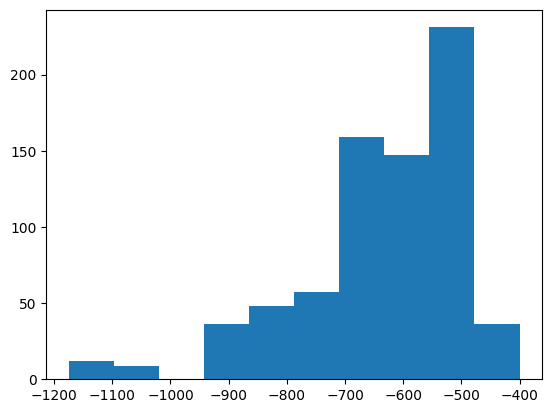

SUNNY CARE NURSERY


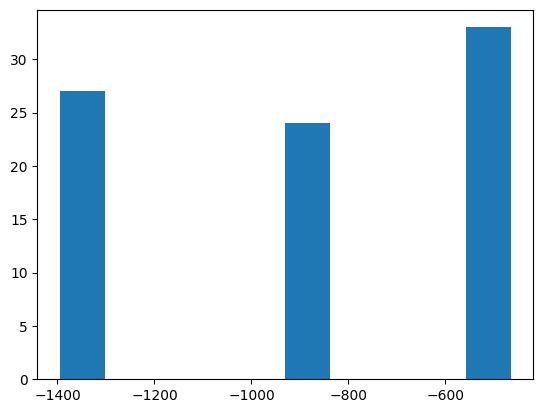

PUREGYM


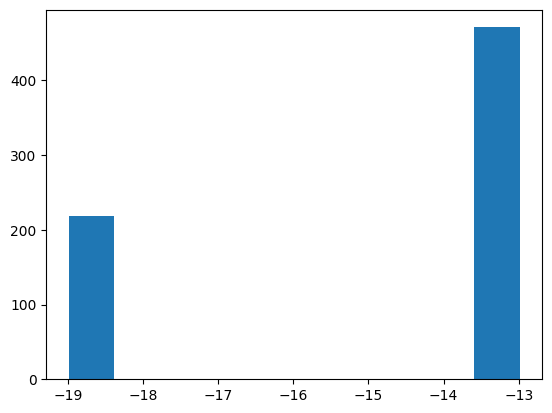

Coop local


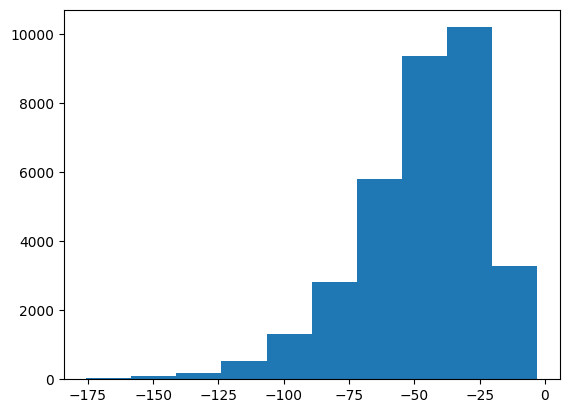

Deliveroo


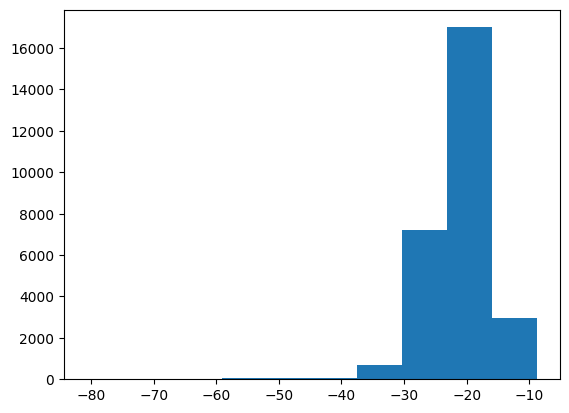

Tesco Express


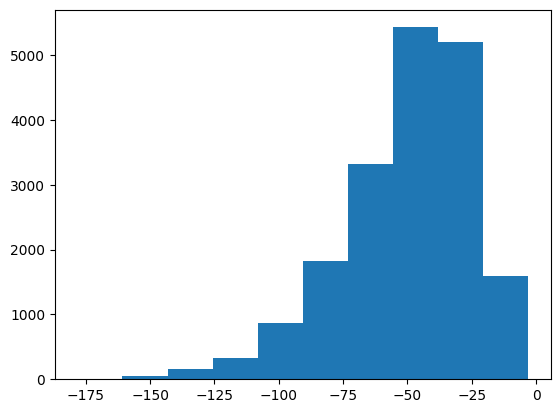

Sainsbury local


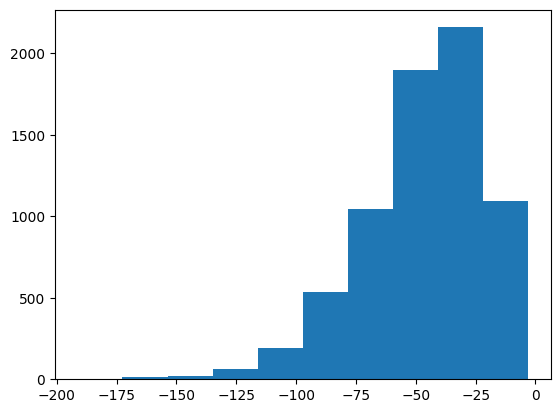

JD Sports


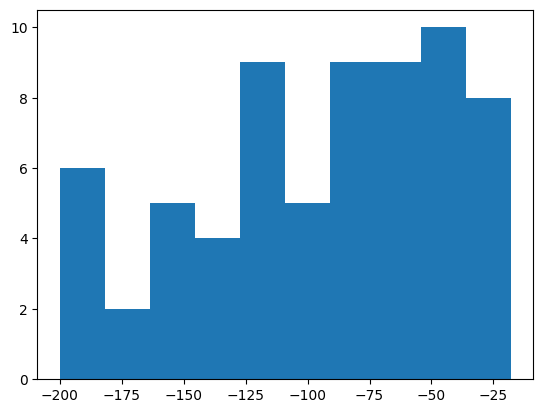

Mountain Warehouse


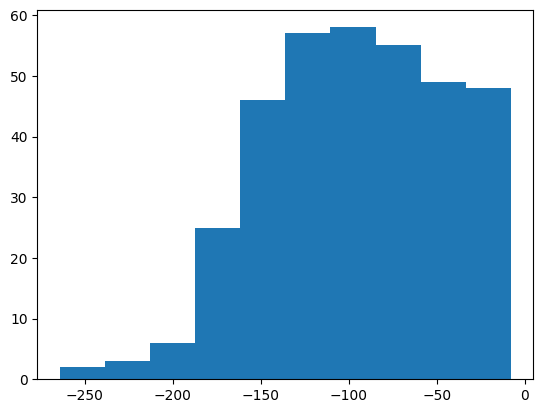

Next


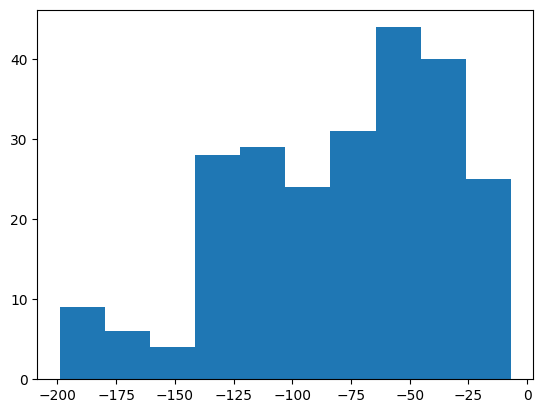

Nike


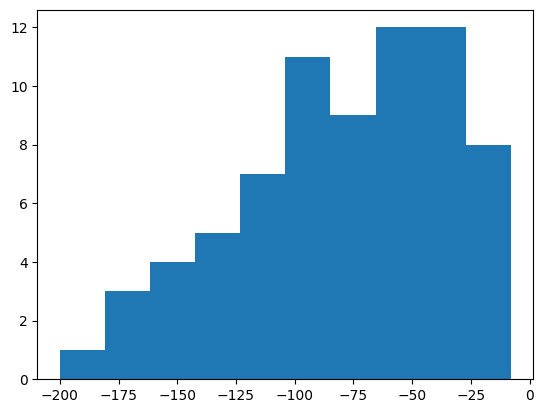

Sports Direct


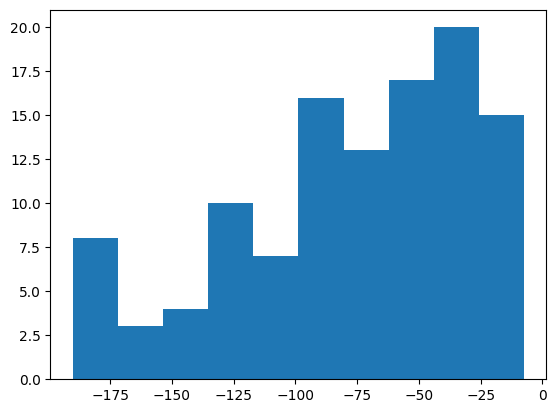

Matalan


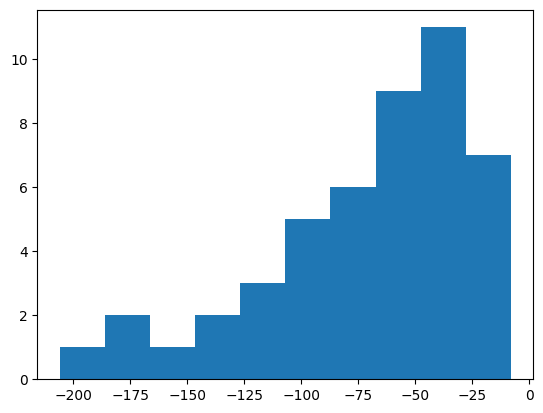

Millets


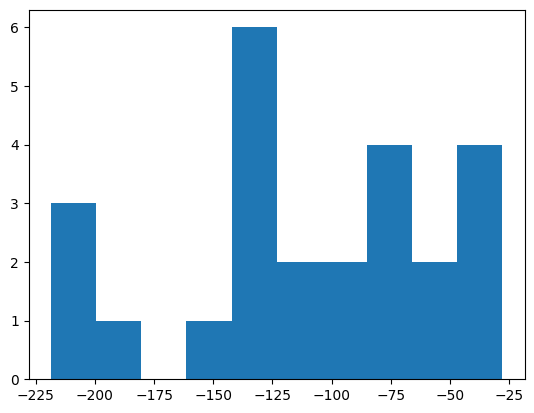

A Yarn Story


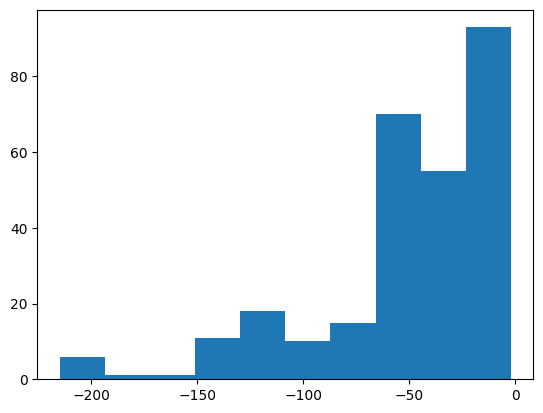

Hobbycraft


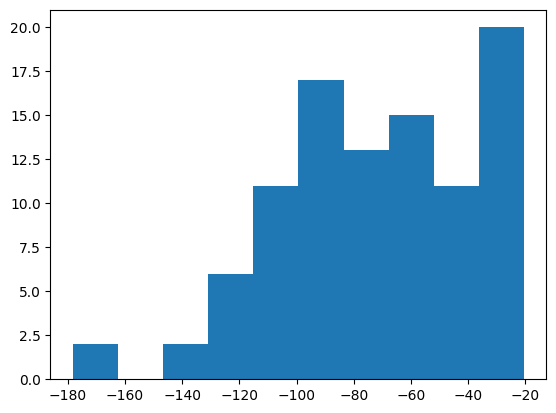

HMV


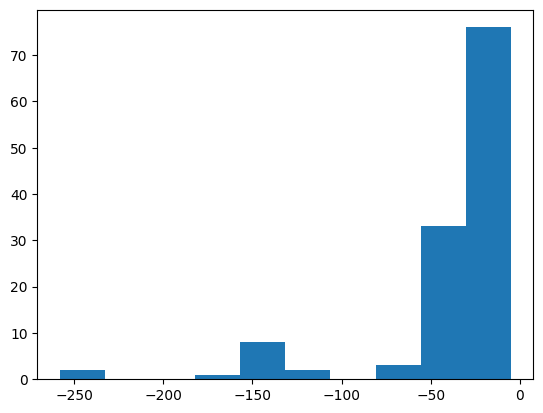

Wool


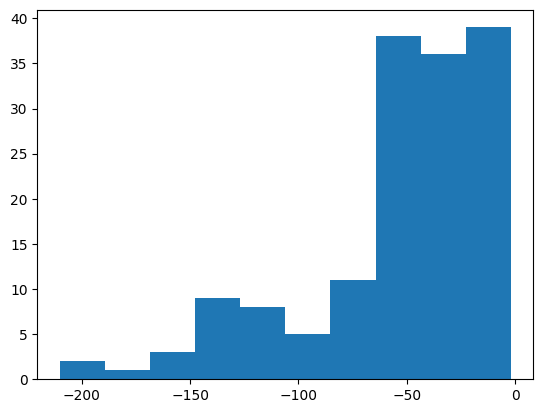

Hobgoblin Music


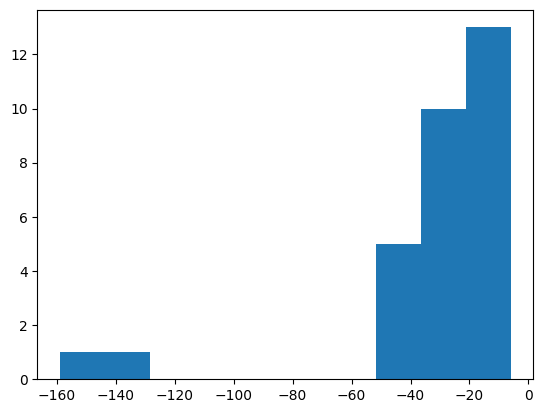

The Crown


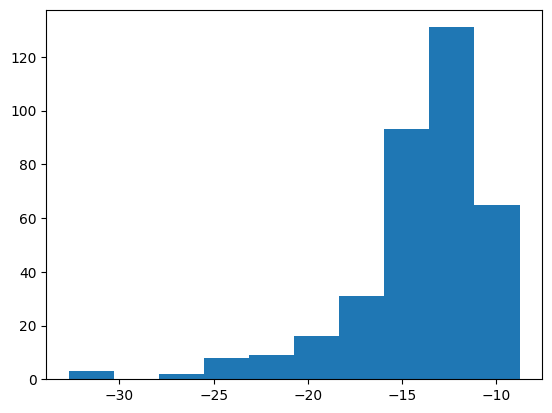

White Hart


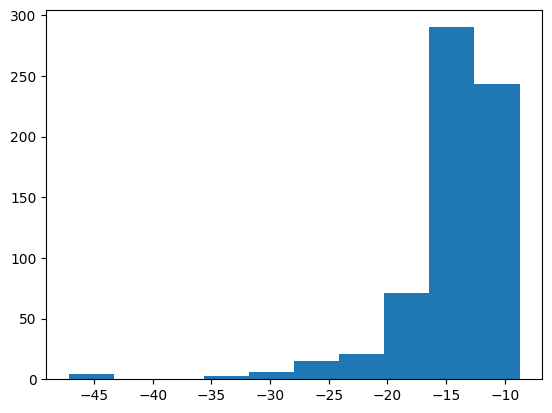

ASK Italian


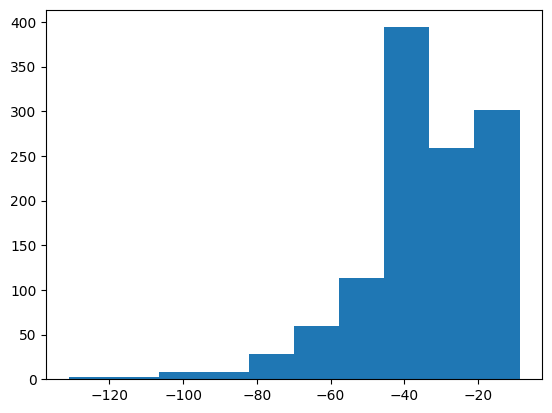

Rose & Crown


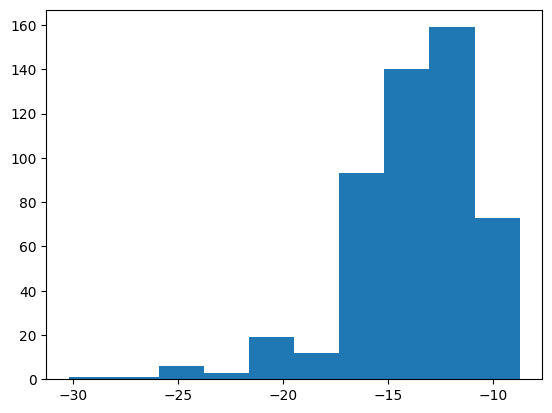

Red Lion


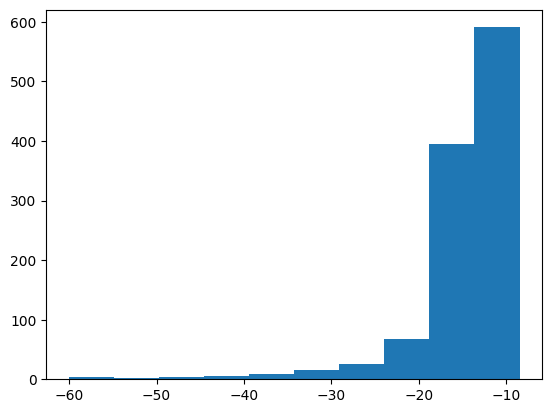

The Royal Oak


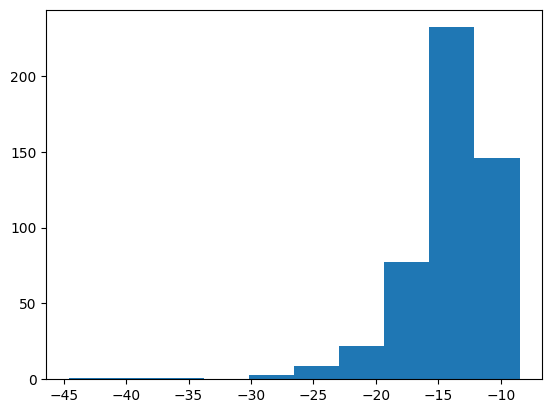

Harvester


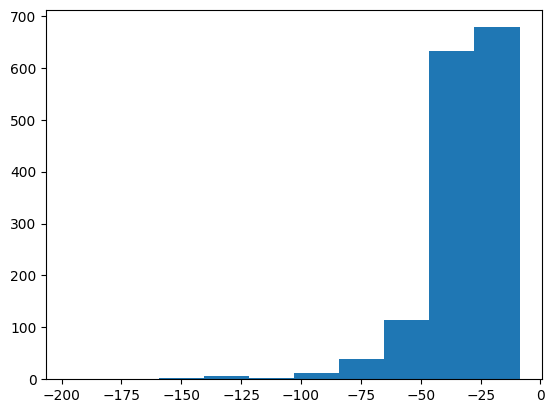

Bill's


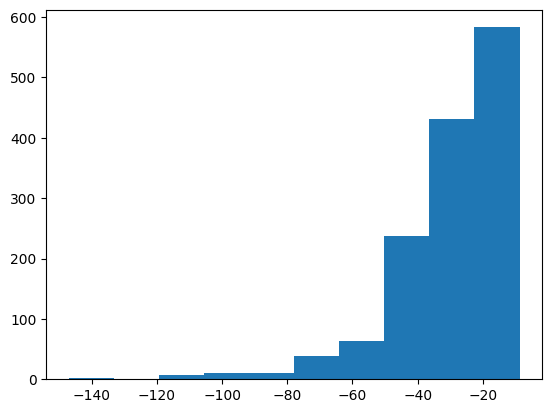

PizzaExpress


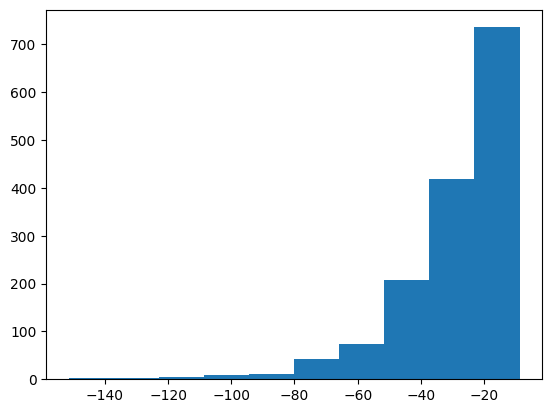

CeX


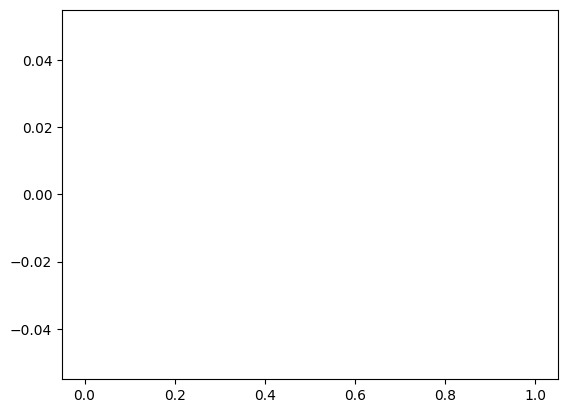

PureGym


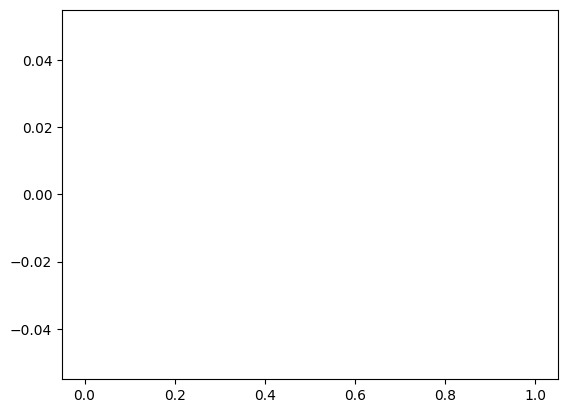

In [122]:
for business in businesses:
    print(business)
    plt.hist(df_spending[df_spending.to_name== business]['Amount'])
    plt.show() 

# Businesses

### What businesses pay the most
Do this in tableau

In [125]:
for business in businesses:
    print(business, df_from_business[df_from_business.to_name== business]['Amount'].mean())
    


Starbucks 3011.731666666667
Adams 3148.8053333333332
North Face 3556.497777777777
Coffee #1 3007.5986666666663
Cass Art 3041.951111111111
TK Maxx 2748.2333333333336
Mickleburgh Musical Instruments 3044.6525925925926
Pets Corner 2941.185238095238
Pets at Home 2887.2383333333332
Costa Coffee 2999.250333333333
Waterstones 2833.223333333334
Gap Kids 2745.9952380952377
Game 3285.5616666666665
H&M 3556.3477777777775
Blackwell's 2853.3075000000003
Halifax nan
SUNNY CARE NURSERY nan
PUREGYM nan
Coop local 3178.1983333333333
Deliveroo nan
Tesco Express 3159.9550000000004
Sainsbury local 3208.0816666666665
JD Sports 3355.1923809523814
Mountain Warehouse 5900.852000000001
Next 3531.577777777778
Nike 3201.749523809524
Sports Direct 2937.0600000000004
Matalan 5038.125714285714
Millets 3019.3100000000004
A Yarn Story 6005.493
Hobbycraft 3340.3128571428574
HMV 4458.871666666668
Wool 4070.1
Hobgoblin Music 3162.595833333333
The Crown 8635.65625
White Hart 8620.553750000001
ASK Italian nan
Rose & Crown

### When do businesses pay
by looking at each business individually,we can do this in tableau

Starbucks


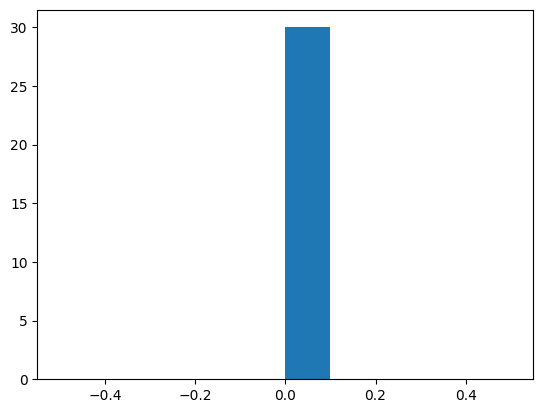

Adams


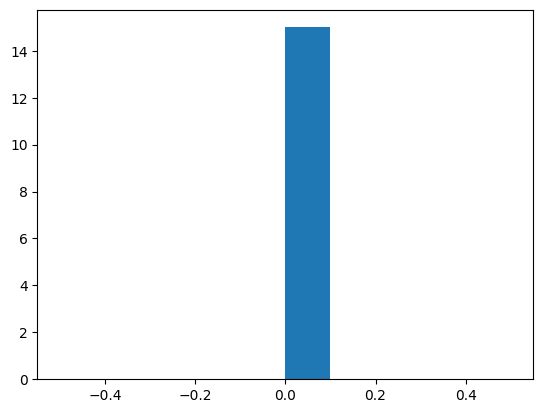

North Face


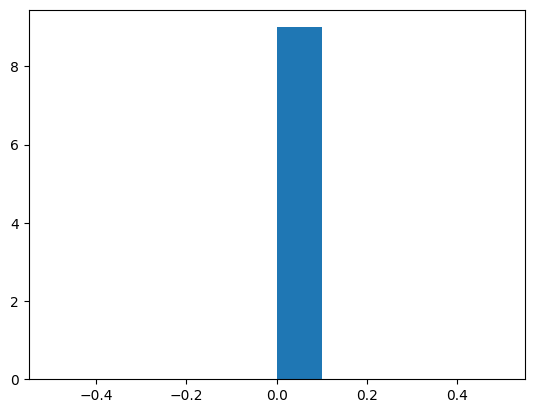

Coffee #1


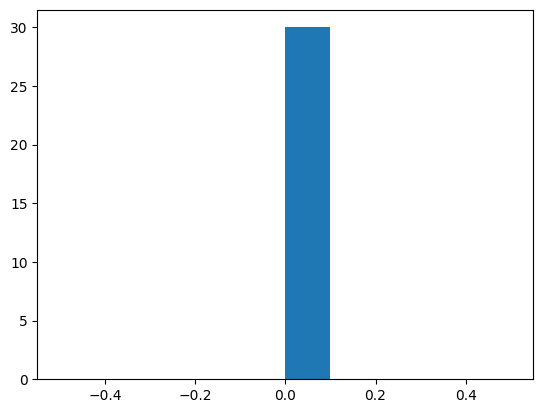

Cass Art


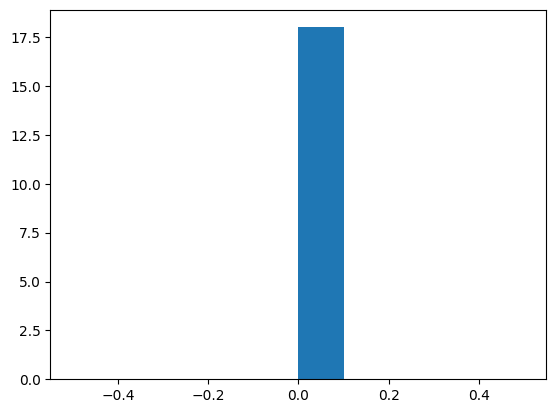

TK Maxx


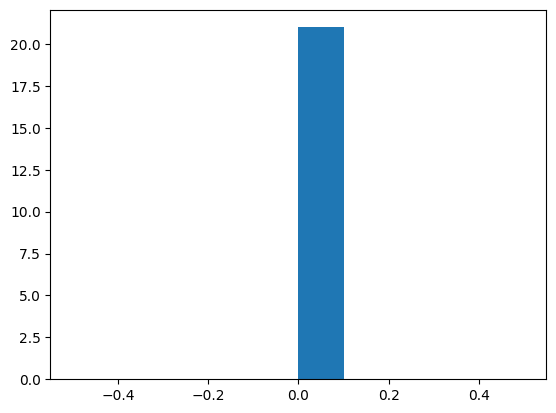

Mickleburgh Musical Instruments


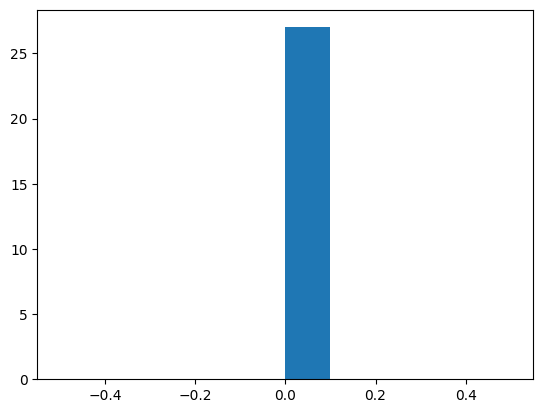

Pets Corner


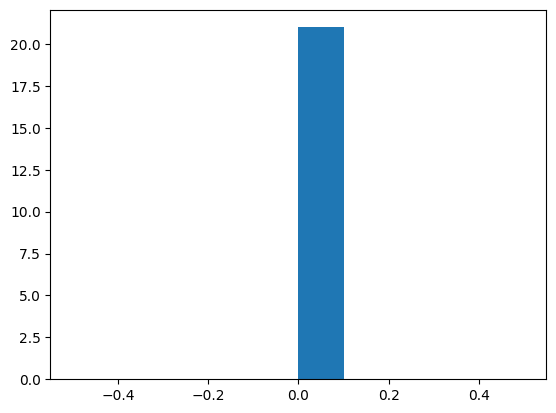

Pets at Home


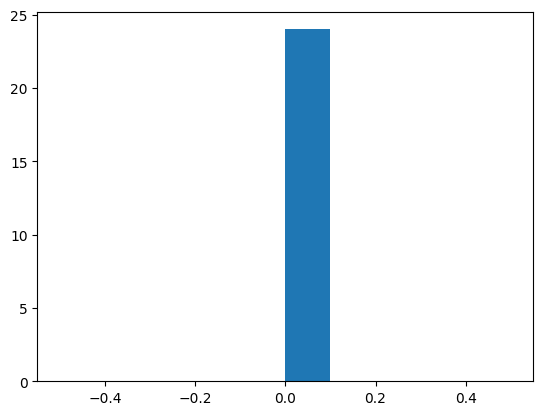

Costa Coffee


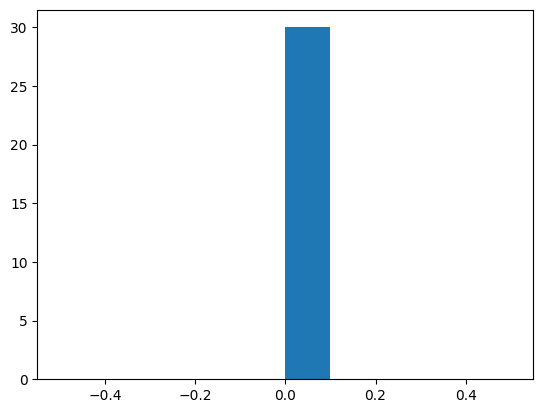

Waterstones


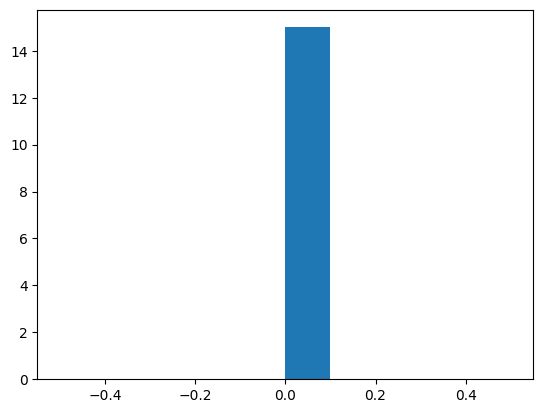

Gap Kids


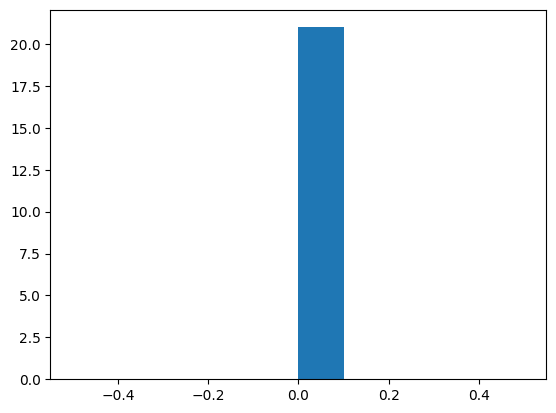

Game


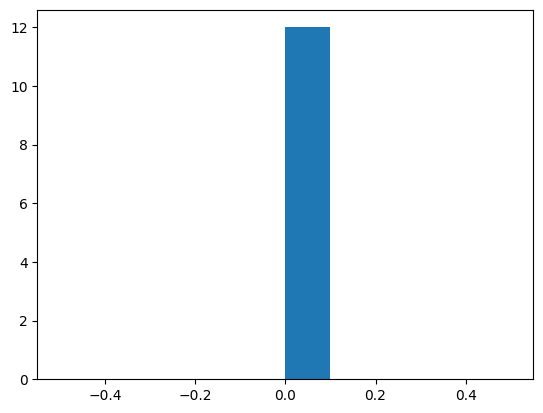

H&M


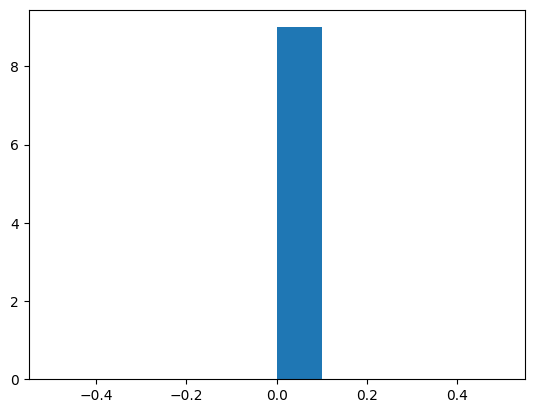

Blackwell's


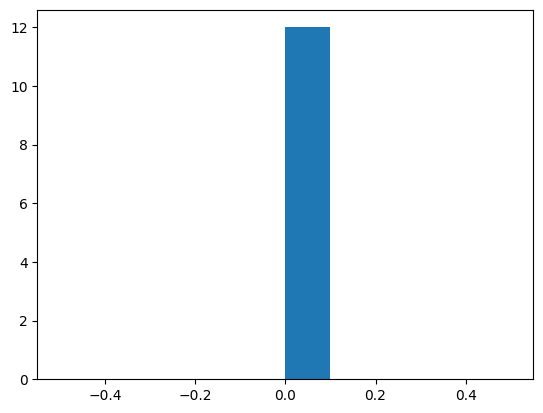

Halifax


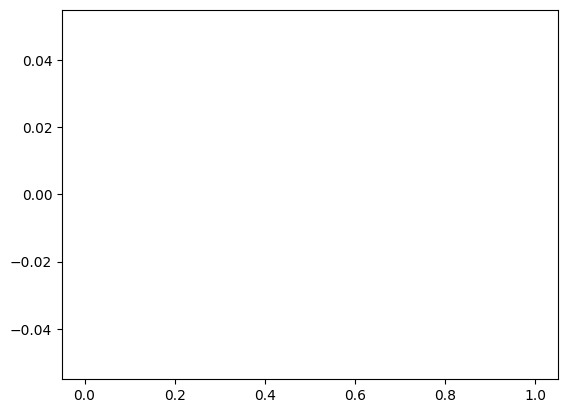

SUNNY CARE NURSERY


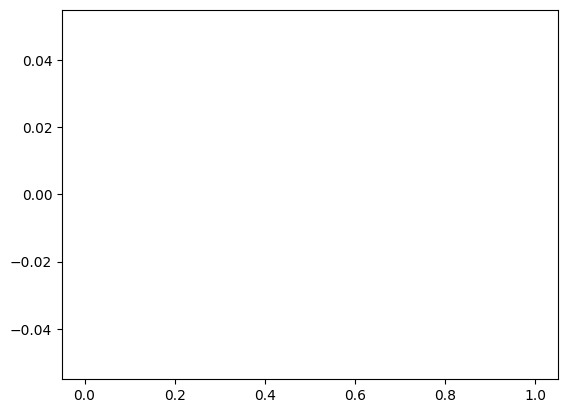

PUREGYM


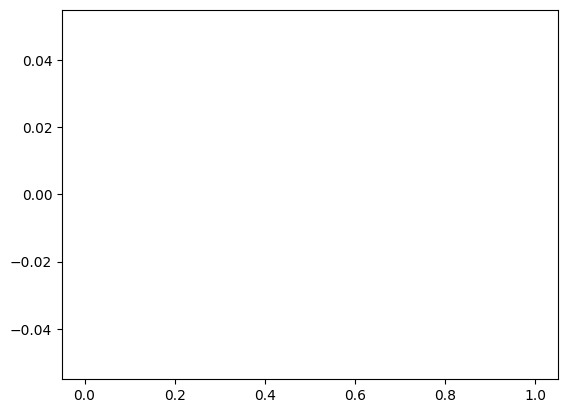

Coop local


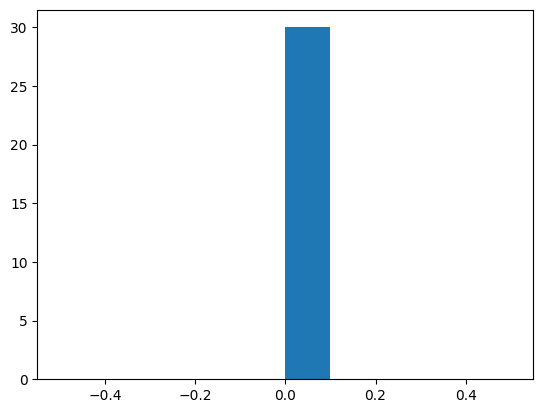

Deliveroo


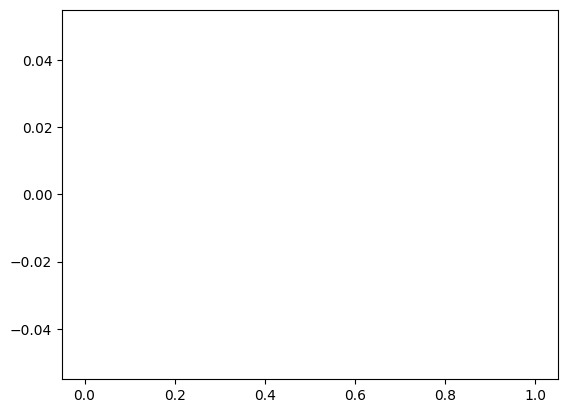

Tesco Express


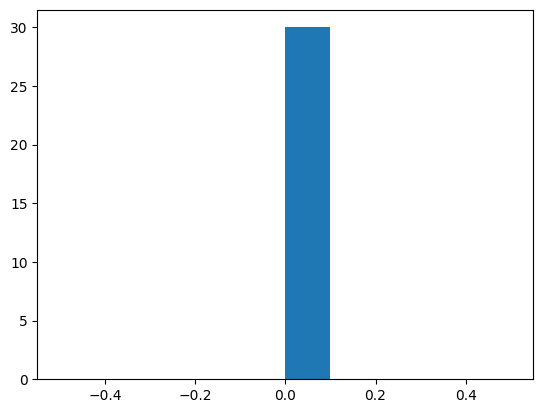

Sainsbury local


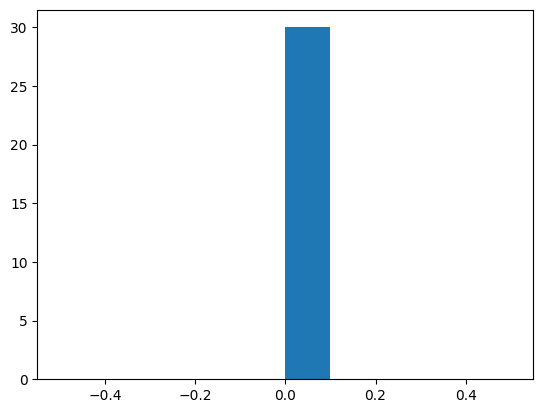

JD Sports


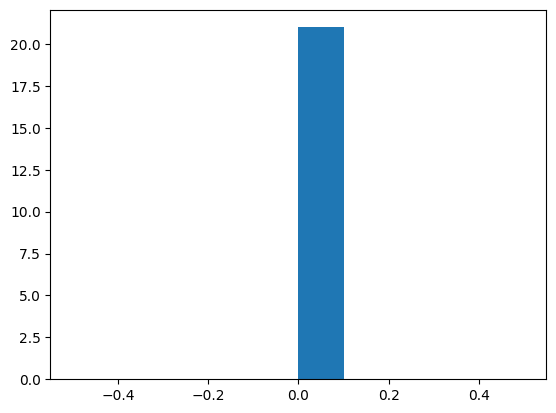

Mountain Warehouse


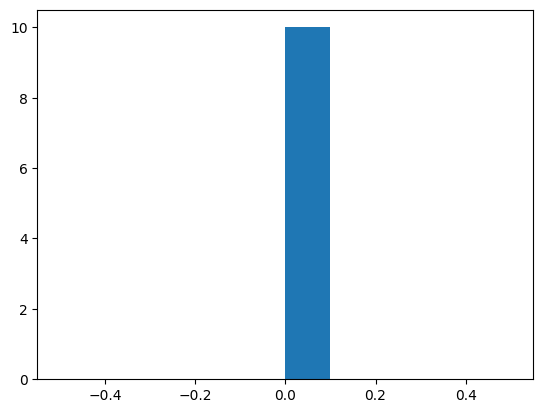

Next


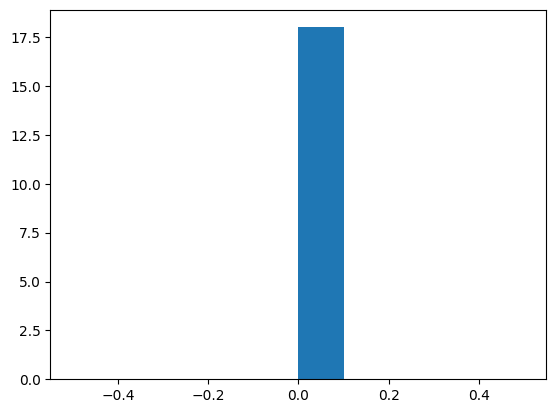

Nike


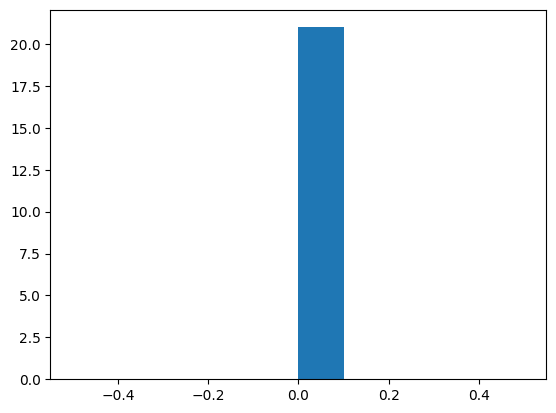

Sports Direct


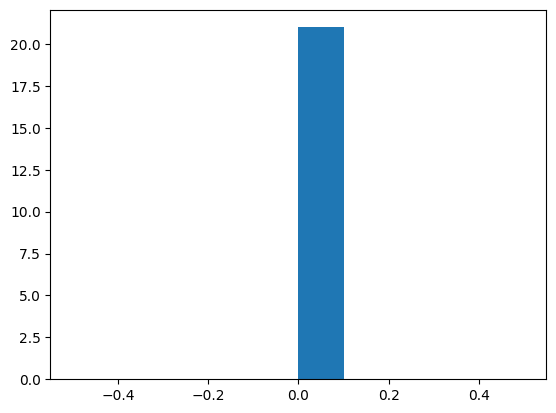

Matalan


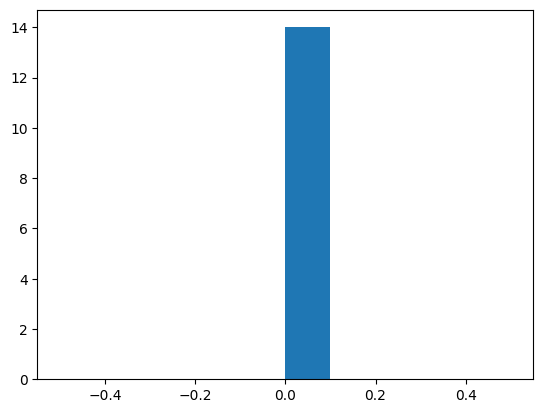

Millets


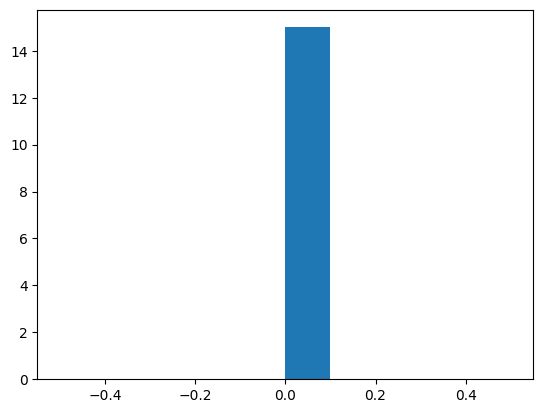

A Yarn Story


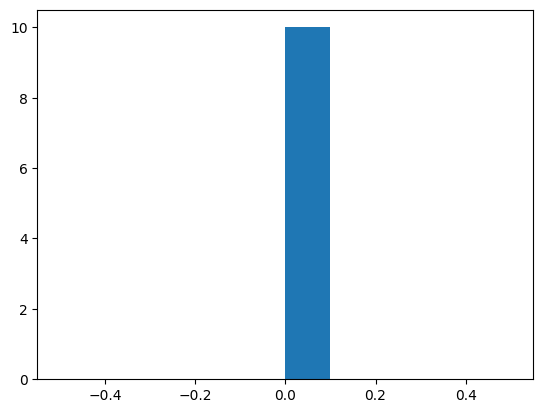

Hobbycraft


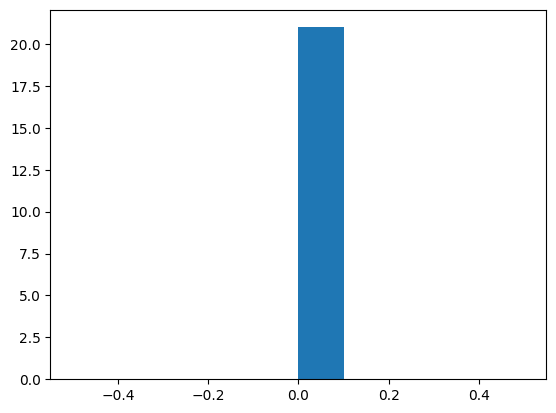

HMV


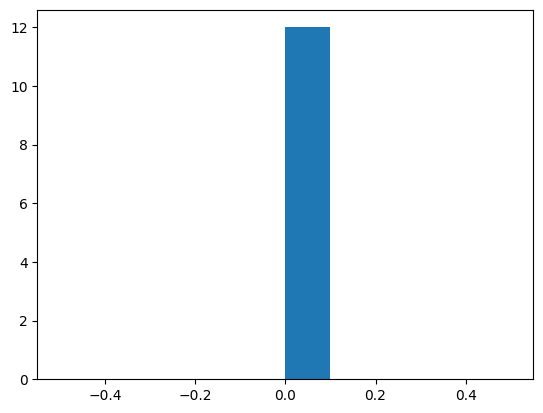

Wool


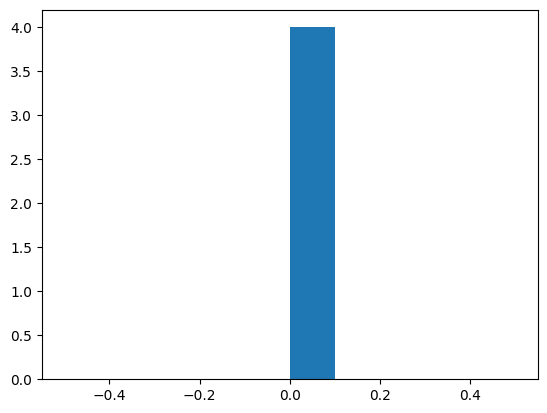

Hobgoblin Music


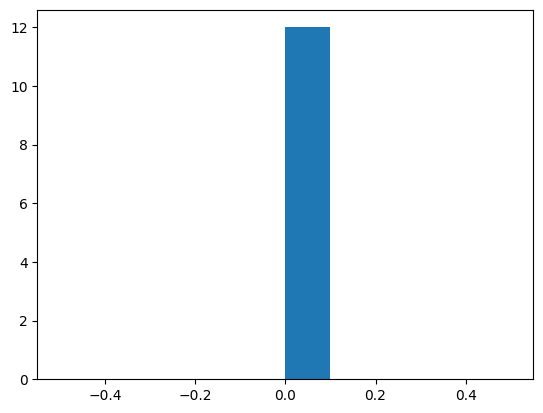

The Crown


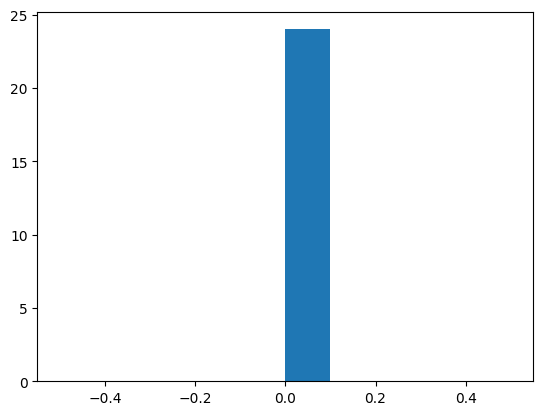

White Hart


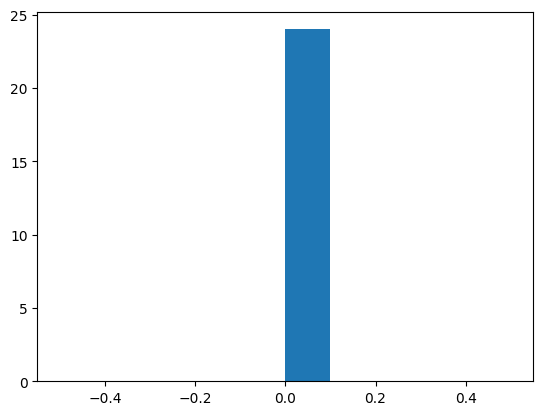

ASK Italian


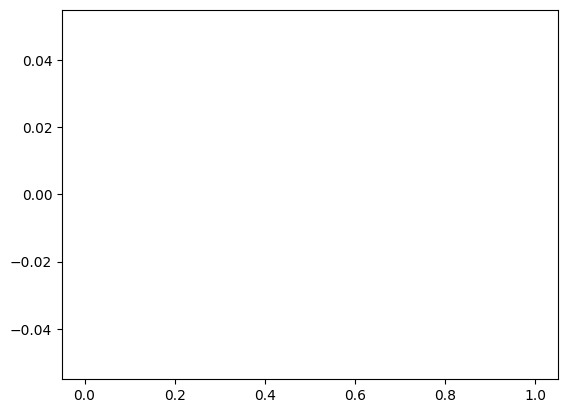

Rose & Crown


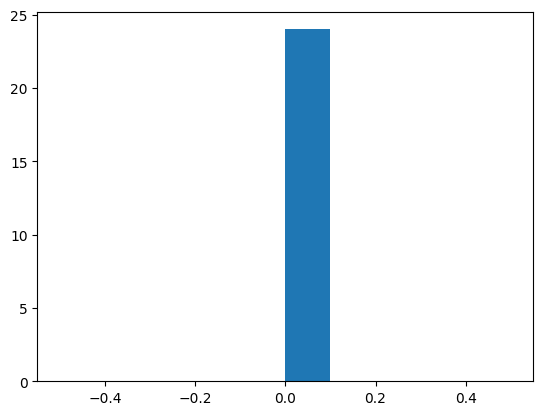

Red Lion


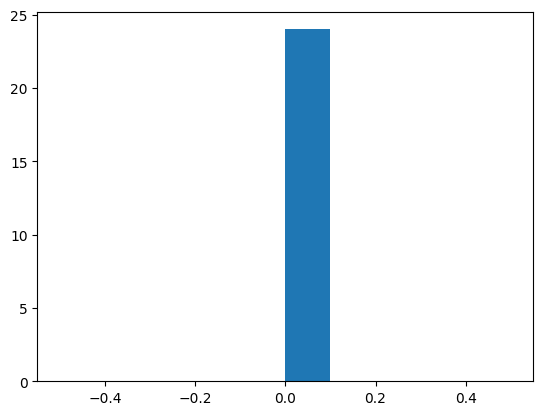

The Royal Oak


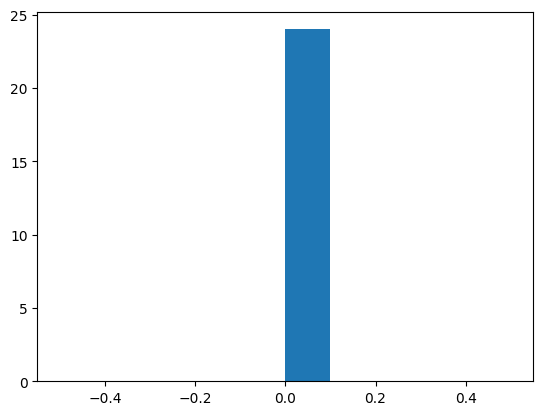

Harvester


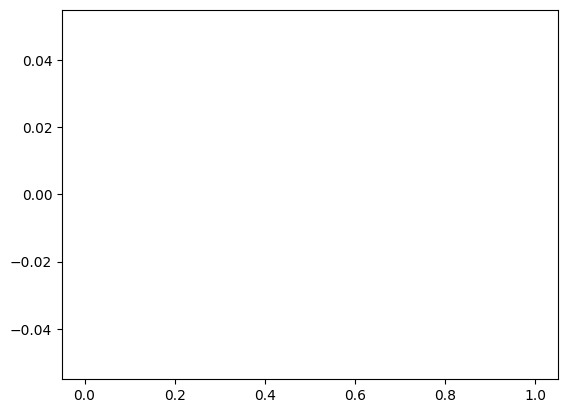

Bill's


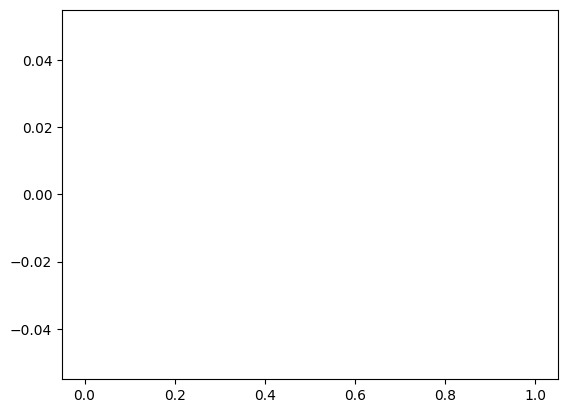

PizzaExpress


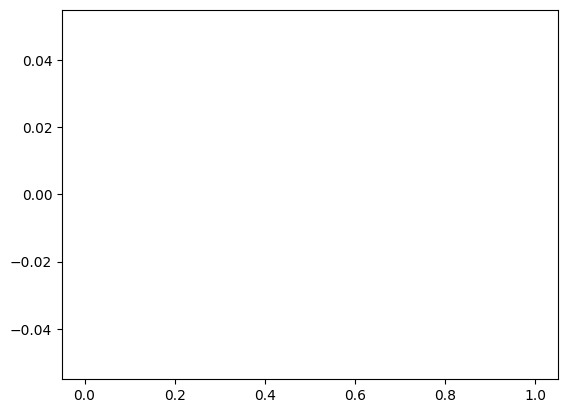

CeX


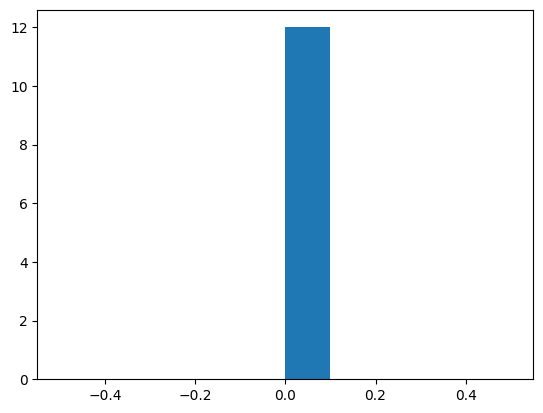

PureGym


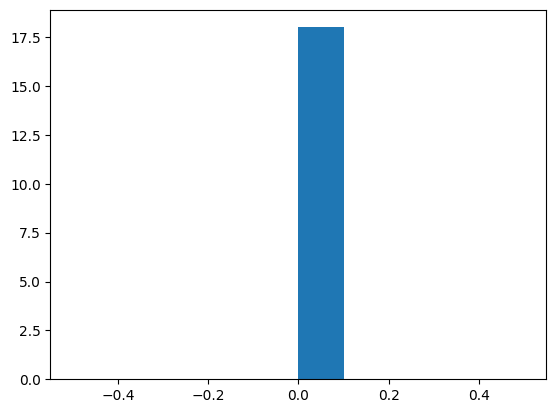

In [126]:

for business in businesses:
    print(business)
    plt.hist(df_from_business[df_from_business.to_name== business]['Decimal_time'])
    plt.show() 

In [127]:
df_from_business[df_from_business.to_name== 'Costa Coffee']['Decimal_time']

10        0.0
11        0.0
15        0.0
59        0.0
64        0.0
66        0.0
67        0.0
71        0.0
83        0.0
90        0.0
60048     0.0
60049     0.0
60053     0.0
60097     0.0
60102     0.0
60104     0.0
60105     0.0
60109     0.0
60121     0.0
60128     0.0
114973    0.0
114974    0.0
114978    0.0
115022    0.0
115027    0.0
115029    0.0
115030    0.0
115034    0.0
115046    0.0
115053    0.0
Name: Decimal_time, dtype: float64

### So all businesses pay at the same time, midnight

# Income

### Who recieves the most money?
We can create a customer df and plot this in tableau

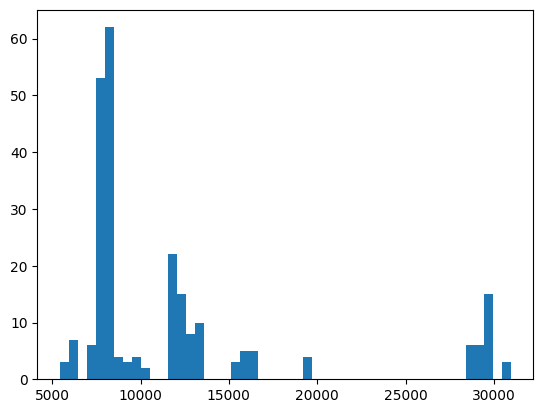

In [134]:
df_from_business.groupby('Account').agg({'Amount': [pd.Series.sum]}).reset_index()['Amount']
plt.hist(df_from_business.groupby('Account').agg({'Amount': [pd.Series.sum]}).reset_index()['Amount'], bins = 50)
plt.show() 

### Can we find unemployment? 
Done in python by looking at who isnt being payed, we may also be able to find out when people become unemployed

In [140]:
customers = df_from_business.groupby('Account').agg({'Amount': [pd.Series.sum]}).reset_index()
customers[customers['Amount']['sum'] < 500]

,Account,Amount
,,sum


### I don't believe it is possible to find unemployment by looking at this data as this data does not cover many potential employers, we how ever still be able to see when people stop being payed and to they may have left or been let go

In [160]:
employment = df_from_business.groupby(['Account', 'to_name']).agg({'Date': np.max}).reset_index()

In [161]:
import datetime
employment['Date'] = pd.to_datetime(employment['Date'])

employment[employment['Date'] < datetime.datetime(2020, 2, 29)] 

,Account,to_name,Date


In [163]:
employment[employment['Date'] < datetime.datetime(2020, 3, 15)] 

,Account,to_name,Date
2,1006,TK Maxx,2020-03-01
8,1020,Costa Coffee,2020-03-01
13,1034,Cass Art,2020-03-01
14,1037,Costa Coffee,2020-03-01
22,1046,Blackwell's,2020-03-01
...,...,...,...
238,1518,TK Maxx,2020-03-01
239,1520,Mickleburgh Musical Instruments,2020-03-01
240,1523,Pets Corner,2020-03-01
241,1524,Pets at Home,2020-03-01


In [168]:
df_from_business[df_from_business['Account'] == 1523]

,Account,Amount,Balance,to_account,to_name,Date,Time,Transaction_ID,Decimal_time,Income,Employment,Day_type,Day
53,1523,1251.20,2037.37,1085.0,Pets Corner,01/01/2020,00:00:00,53,0.0,2609.58,Employed,weekday,Wednesday
60091,1523,2672.49,2083.83,1085.0,Pets Corner,02/01/2020,00:00:00,60091,0.0,2609.58,Employed,weekend,Saturday
115016,1523,3905.05,3789.98,1085.0,Pets Corner,03/01/2020,00:00:00,115016,0.0,2609.58,Employed,weekend,Sunday


### So we can see noone has become un employed in this dataset, this is a limitation i have found

# Halifax

### Halifax payments
We will analyse halifax data in in tableau

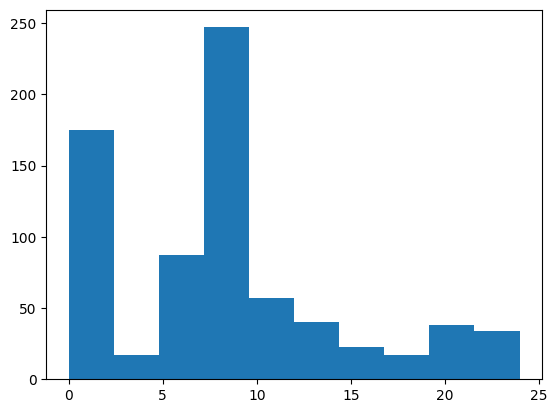

In [172]:
plt.hist(df[df['to_name'] == 'Halifax']['Decimal_time'])
plt.show() 

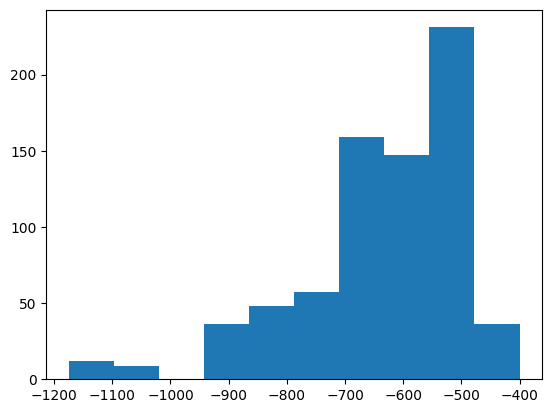

In [173]:
plt.hist(df[df['to_name'] == 'Halifax']['Amount'])
plt.show() 

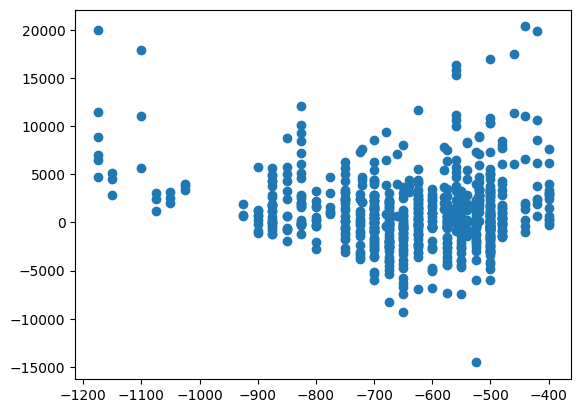

In [176]:
plt.scatter(df[df['to_name'] == 'Halifax']['Amount'], df[df['to_name'] == 'Halifax']['Balance'])
plt.show()

### It seems as though balance is indpendant to amount of money being given by Halifax, Halifax also send money at all times, and there is no data for people sending money back to halifax.

# Balance

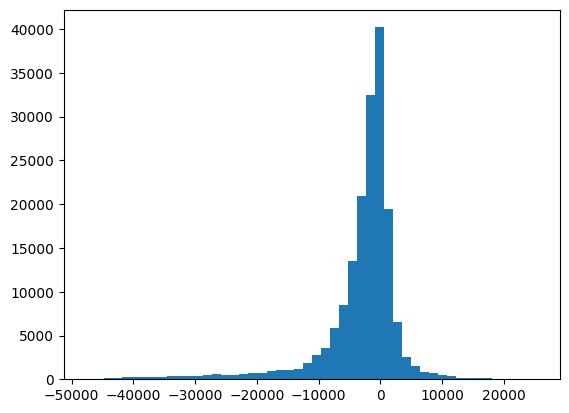

In [181]:
plt.hist(df['Balance'], bins = 50)
plt.show()

### is this normaly distributed?

In [186]:
import numpy as np
from scipy.stats import shapiro
from numpy.random import randn
 
# Create data
 
# conduct the  Shapiro-Wilk Test
shapiro(np.array(df['Balance']))

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/stats/_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.7357965707778931, pvalue=0.0)

### No it is not normally distributed

### Balance can be negative, this may be handy to classify customers

### How does balance fluctuate?
We can aggregate everyones balance at once to find any patterns in tableau by first creating a customer df

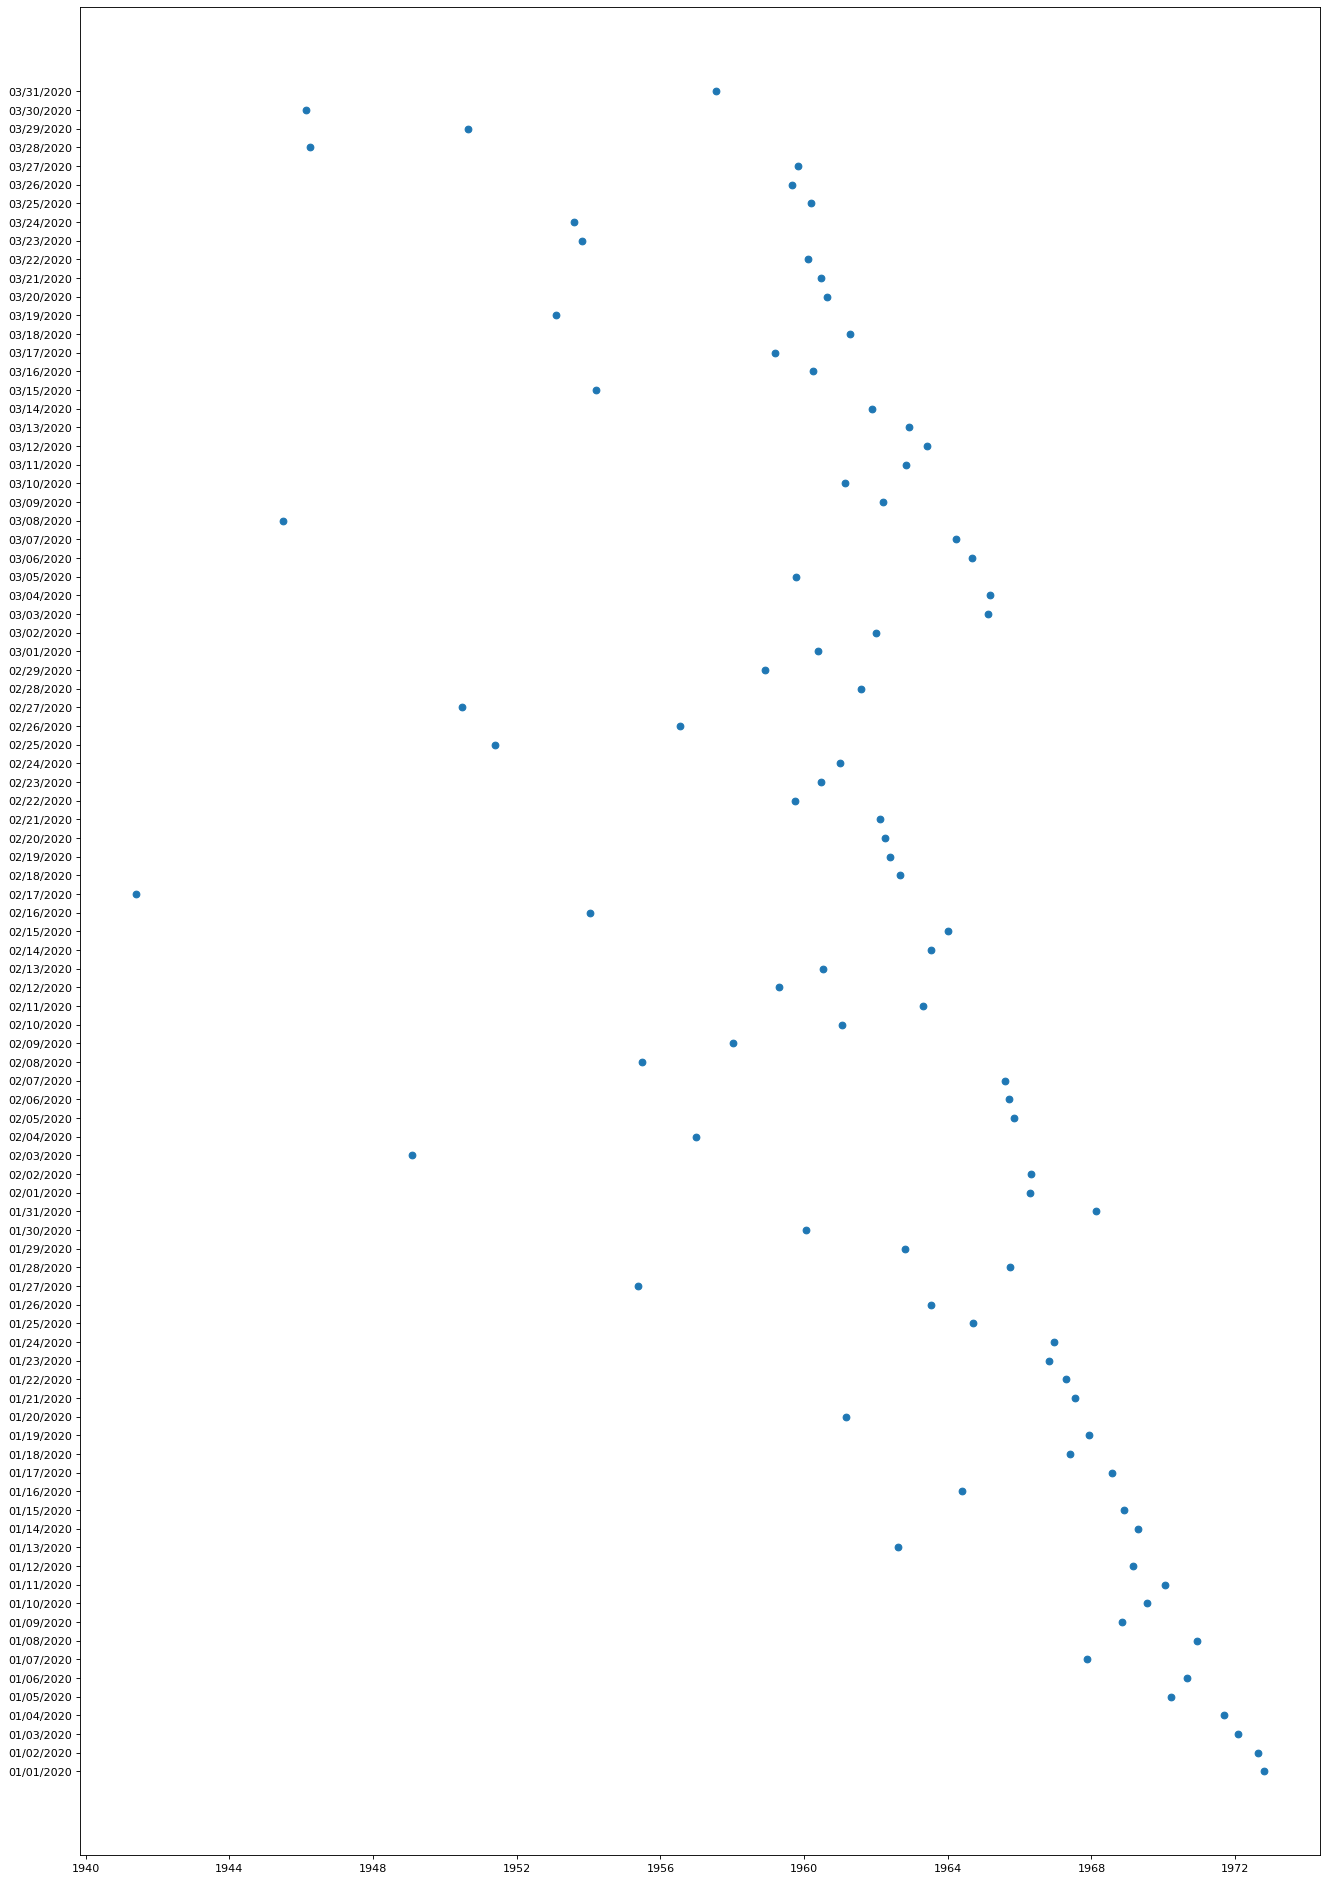

In [203]:
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 

y_values = df['Date'].unique()
x_values = [df[df.Date == x]['Balance'].mean() for x in y_values]

from matplotlib.pyplot import figure


figure(figsize=(20, 30), dpi=80)


plt.plot_date(x_values, y_values)

### Balance decreases as time goes on

### How is balance spread?
We can take the max/avrg/min balance of each customer and plot this in tableau

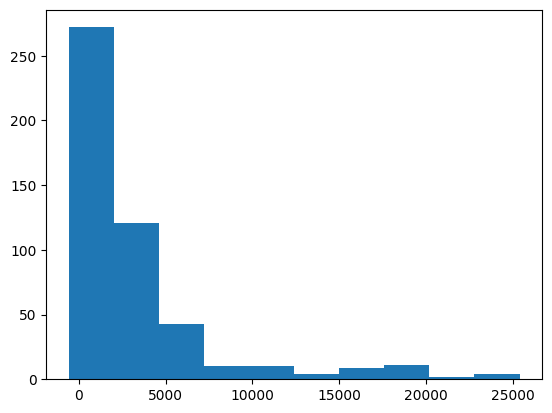

In [206]:
plt.hist(df.groupby('Account').agg({'Balance': np.max})['Balance'])
plt.show()

### Most people have a low balance

# Between

### Find businesses (maybe landlords/people paying rent?)
We can look at who is recieving a lot of money and reccurring payments

In [227]:

repeats = df_between.groupby(['Account', 'to_account', 'Decimal_time', 'Amount']).agg({'Date': pd.Series.count})


In [228]:
repeats = repeats[repeats.Date > 1].reset_index()
repeats

,Account,to_account,Decimal_time,Amount,Date
0,1003,1508.0,0.0,-550.0,3
1,1014,1028.0,0.0,-650.0,3
2,1028,1014.0,0.0,650.0,3
3,1028,1229.0,0.0,825.0,3
4,1036,1138.0,0.0,500.0,3
...,...,...,...,...,...
65,1508,1318.0,0.0,625.0,3
66,1508,1377.0,0.0,525.0,3
67,1508,153.0,0.0,700.0,3
68,1514,131.0,0.0,-600.0,3


In [229]:
repeats.Decimal_time.unique()

array([0.  , 8.37])

In [230]:
repeats.Date.unique()

array([3, 2])

###  we have found repeat payments, and all of these are substantial, they could all be rent payments, and this can help the bank advertise mortgages to customers to help buy

In [285]:
array = np.array(repeats[repeats.Amount > 0]['to_account'])
len((set(array))) == len(array)

True

In [290]:
landlords = repeats[repeats.Amount > 0]['Account'].unique()
tenants = repeats[repeats.Amount > 0]['to_account']

In [292]:
repeats[repeats.Amount > 0]

,Account,to_account,Decimal_time,Amount,Date
2,1028,1014.0,0.00,650.0,3
3,1028,1229.0,0.00,825.0,3
4,1036,1138.0,0.00,500.0,3
5,1036,1171.0,0.00,600.0,3
6,1036,1176.0,0.00,575.0,3
7,1036,1381.0,0.00,850.0,3
8,1036,1444.0,0.00,800.0,3
12,1084,1068.0,0.00,700.0,3
13,1084,1125.0,0.00,550.0,3
14,1084,1346.0,0.00,500.0,3


In [307]:
for landlord_tennant in np.array(repeats[['Account','to_account']]):
    print(df[(df.Account == landlord_tennant[0]) & (df.to_account == landlord_tennant[1])]['Date'])

[1003 '1508.0']
122       01/01/2020
60160     02/01/2020
115085    03/01/2020
Name: Date, dtype: object
[1014 '1028.0']
118       01/01/2020
60156     02/01/2020
115081    03/01/2020
Name: Date, dtype: object
[1028 '1014.0']
119       01/01/2020
60157     02/01/2020
115082    03/01/2020
Name: Date, dtype: object
[1028 '1229.0']
23361     01/12/2020
82970     02/12/2020
136518    03/12/2020
Name: Date, dtype: object
[1036 '1138.0']
103       01/01/2020
60141     02/01/2020
115066    03/01/2020
Name: Date, dtype: object
[1036 '1171.0']
38928     01/20/2020
96898     02/20/2020
151188    03/20/2020
Name: Date, dtype: object
[1036 '1176.0']
40882     01/21/2020
98414     02/21/2020
152736    03/21/2020
Name: Date, dtype: object
[1036 '1381.0']
99        01/01/2020
60137     02/01/2020
115062    03/01/2020
Name: Date, dtype: object
[1036 '1444.0']
101       01/01/2020
60139     02/01/2020
115064    03/01/2020
Name: Date, dtype: object
[1068 '1084.0']
50872     01/27/2020
108800    02/27/20

### So we have found a list of possible tennants and landlords

In [299]:
df

,Account,Amount,Balance,to_account,to_name,Date,Time,Transaction_ID,Decimal_time,Income,Employment,Day_type,Day
0,1461,1352.00,2582.04,1379.0,Starbucks,01/01/2020,00:00:00,0,0.00,2811.08,Employed,weekday,Wednesday
1,1088,1251.20,2285.19,1244.0,Adams,01/01/2020,00:00:00,1,0.00,2603.54,Employed,weekday,Wednesday
2,1447,1968.50,2479.09,1101.0,North Face,01/01/2020,00:00:00,2,0.00,4043.70,Employed,weekday,Wednesday
3,1207,1352.00,2530.55,1178.0,Coffee #1,01/01/2020,00:00:00,3,0.00,2768.97,Employed,weekday,Wednesday
4,1136,1968.50,3627.45,1305.0,Cass Art,01/01/2020,00:00:00,4,0.00,3975.15,Employed,weekday,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
174596,1391,-19.24,-6585.98,Deliveroo,Deliveroo,03/31/2020,23:55:00,174596,23.92,NaN,Unemployed,weekday,Tuesday
174597,1405,-10.99,-1179.87,Deliveroo,Deliveroo,03/31/2020,23:56:00,174597,23.93,9624.01,Employed,weekday,Tuesday
174598,1391,-20.89,-6606.87,Deliveroo,Deliveroo,03/31/2020,23:56:00,174598,23.93,NaN,Unemployed,weekday,Tuesday
174599,1391,-17.24,-6624.11,Deliveroo,Deliveroo,03/31/2020,23:57:00,174599,23.95,NaN,Unemployed,weekday,Tuesday


### Trends in time
Using tableau we can plot the data

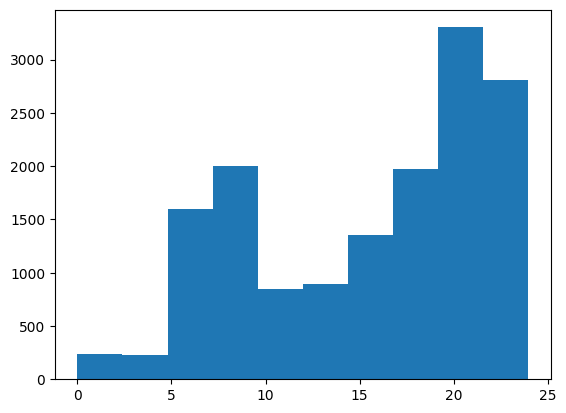

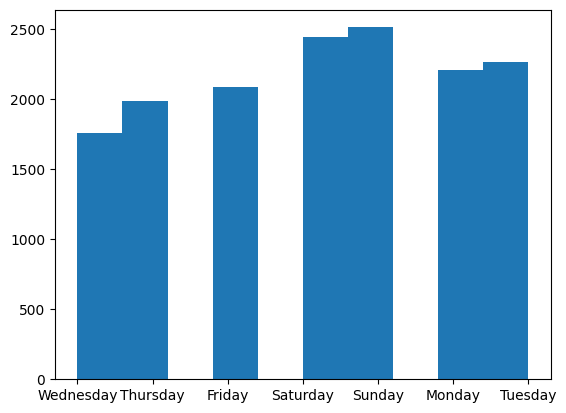

In [297]:
plt.hist(df_between['Decimal_time'])
plt.show()
plt.hist(df_between['Day'])
plt.show()


# In conclusion the simulation is much more realistic than the first. The only inaccuracy in this simulation is that no one loses their job. 
# I managed to find important information for the bank, obtaining a list of possible landlords and tennants, under the assumption that people who send money (around £600-£800) at the same time (00:00) on the same day (1st of each month) to a person are tennants, and the person they send money to is a landlord, when we also know that multiple people send the landlord money in this way 